In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import shapely
from shapely import points
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import warnings
import geopandas as gpd
warnings.filterwarnings("ignore")

In [3]:
df_0414 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-apr14.csv")
df_0514 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-may14.csv")
df_0614 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-jun14.csv")
df_2015 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-janjune-15.csv")

In [20]:
df_0414.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [21]:
df_0514.head()

Date/Time      Lat      Lon    Base
0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
4  5/1/2014 0:17:00  40.7594 -73.9734  B02512

In [22]:
df_0614.head()

Date/Time      Lat      Lon    Base
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512
3  6/1/2014 0:04:00  40.7555 -73.9833  B02512
4  6/1/2014 0:07:00  40.6880 -74.1831  B02512

In [22]:
df_2015.head()

Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90

In [23]:
df_2015.shape

(14270479, 4)

In [24]:
# MERGING ALL THE DATFRAMES TOGETHER - USING .CONCAT IN CONJUNCTION WITH .DATAFRAME() 

q1402 = pd.DataFrame()

q1402 = pd.concat([df_0414, df_0514 ,df_0614, q1402])

q1402.shape



(1880795, 4)

In [26]:
# CHECK THE NEW DATAFRAME CREATED USING .CONCAT

q1402.head()
q1402.tail()
q1402.shape


(1880795, 4)

In [27]:
# CHECKING FOR DUPLICATED VALUES: 

q1402.head()
q1402.duplicated().sum() # CHECKING HOW MANY DUPLICATE VALUES ARE IN THE NEW DATAFRAME
q1402.drop_duplicates(inplace = True) #DROPPING DUPLICATE VALUES IN DATAFRAME
q1402.shape # CHECKING DUPLICATE VALUES HAVE BEEN REMOVED FROM DATAFRAME (4534327 TO 4451746) - Removed 82581 duplicates


(1852285, 4)

In [28]:
# CHECKING DATATYPES: 

q1402.dtypes # Date/Time needs to be a date/time datatype (not a string)


Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [29]:
# CHECKING DATAFRAME FOR NULL VALUES 
q1402.isnull().sum() # NO NULL CALUES PRESENT IN THE DATAFRAME 

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [30]:
q1402.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [31]:
# CONVERTING THE DATE/TIME COLUMN FROM STRING INTO A DATE/TIME DATA TYPE

q1402['Date/Time'] = pd.to_datetime(q1402['Date/Time']) # Note - Make sure you overwrite the correct column you want to change i.e final[Date/Time]



In [32]:
q1402.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [33]:
q1402.head()

Date/Time      Lat      Lon    Base
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512

In [34]:
# CREATING AN HOUR COLUMN IN DATAFRAME
q1402['hour'] = q1402['Date/Time'].dt.hour

In [35]:
# CONVERTING DATETIME INTO DAY: 
q1402['day_name'] = q1402['Date/Time'].dt.day_name()
q1402.head()

Date/Time      Lat      Lon    Base  hour day_name
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     0  Tuesday
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     0  Tuesday
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512     0  Tuesday
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512     0  Tuesday
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512     0  Tuesday

In [36]:
# CONVERTING DATETIME INTO HOUR: 
q1402['hour'] = q1402['Date/Time'].dt.hour
q1402.head()

Date/Time      Lat      Lon    Base  hour day_name
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     0  Tuesday
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     0  Tuesday
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512     0  Tuesday
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512     0  Tuesday
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512     0  Tuesday

In [38]:
q1402.columns

Index(['date_time', 'lat', 'lon', 'base', 'hour', 'day_name'], dtype='object')

In [37]:
#renaming columns into lowercase and without spaces: 
q1402.rename({'Date/Time': 'date_time', 'Lat':'lat', 'Lon':'lon', 'Base':'base', 'Hours':'hours'}, axis = 1, inplace= True)
q1402.head()

date_time      lat      lon    base  hour day_name
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     0  Tuesday
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     0  Tuesday
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512     0  Tuesday
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512     0  Tuesday
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512     0  Tuesday

#### DATA ANALYSIS

In [39]:
q1402.head()

date_time      lat      lon    base  hour day_name
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     0  Tuesday
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     0  Tuesday
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512     0  Tuesday
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512     0  Tuesday
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512     0  Tuesday

In [40]:
q1402.tail()

date_time      lat      lon    base  hour day_name
663839 2014-06-30 22:40:00  40.7332 -73.9872  B02764    22   Monday
663840 2014-06-30 23:12:00  40.7905 -73.9796  B02764    23   Monday
663841 2014-06-30 23:13:00  40.7640 -73.9887  B02764    23   Monday
663842 2014-06-30 23:15:00  40.7262 -73.9944  B02764    23   Monday
663843 2014-06-30 23:35:00  40.7404 -73.9848  B02764    23   Monday

In [41]:
base_count = q1402.copy()

In [42]:
pivot = q1402.groupby(['hour','day_name']).size().unstack()
pivot_reindex = pivot.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot_chart = pivot_reindex

In [43]:
pivot_chart

day_name  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
hour                                                                    
0           2165     2165       2682      3517    5122     10273   13693
1           1223     1186       1484      2002    2966      6964    8843
2            953      873       1077      1376    1921      4493    5495
3           2212     1532       1769      2132    2644      3453    3868
4           3651     2588       2738      3207    3398      2473    2316
5           5776     4939       5167      5879    5159      2611    2138
6          10166    10529      11516     12419   10471      3139    2370
7          13322    14559      15876     16624   14524      4027    3052
8          11954    12359      13889     15429   13677      5363    4331
9           8657     8574      10150     11428   10328      6719    6100
10          7733     8269      10012     10596    9759      7747    7300
11          7678     8454      10154     10269   10680      8505    8311
12          7883     8580      10540     10738   11187      9251    9108
13          9103    10611      12260     13108   12935     10130    9966
14         11700    13231      15464     15779   15888     11770   10705
15         13884    16853      19502     19637   19832     16156   12312
16         16767    20594      22730     22508   22199     19379   12983
17         18106    22770      24737     25922   24101     17783   11777
18         14495    18750      22460     23966   25853     19178   10196
19         13091    16203      19352     21267   22288     16009    9464
20         12471    16975      20096     22844   18867     15029    9003
21         11368    15743      18940     23430   21284     18065    9272
22          7535    10265      13573     19341   21651     20623    7210
23          4358     5598       7181     10894   17483     18679    4324

In [29]:
# pivot_chart = pivot_chart.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0])
# pivot_chart.rename({'0':'24'}, axis = 0)

In [30]:
# pivot_chart = pivot_chart.rename({0:24}, axis = 0)

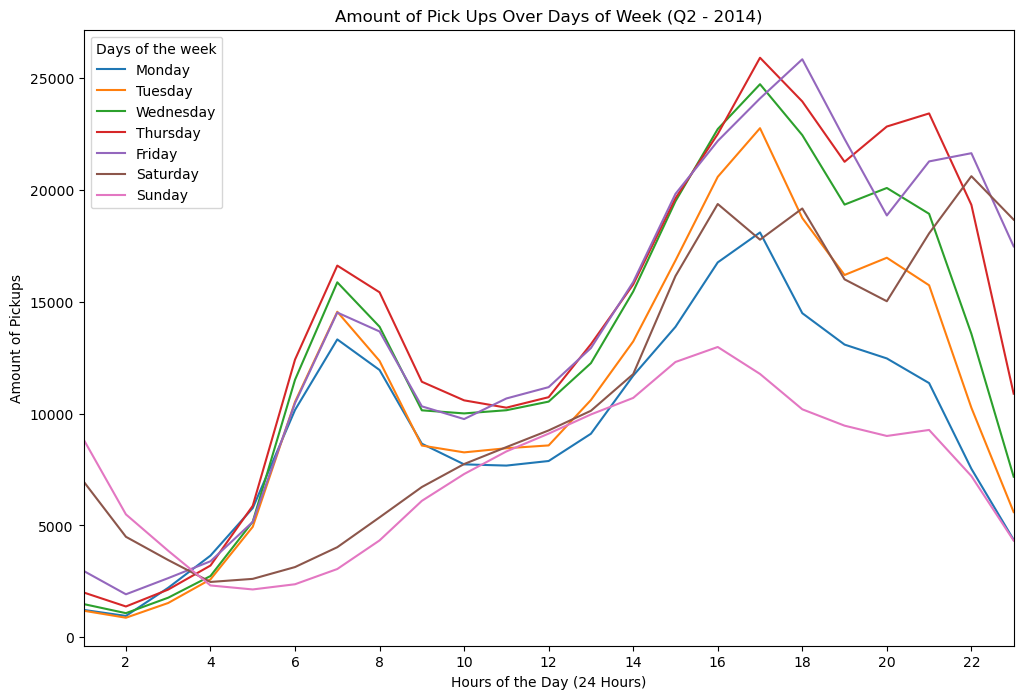

In [31]:

# Uber Blue - #1fbad6
# Uber Grey - #C0C0C8
# Dark Grey - #2D2D2D

#THURSDAY COMPARE TO MONDAY - HIGHLIGHT: 

custom_thurs = ['#2D2D2D', '#C0C0C8', '#C0C0C8', '#1fbad6', '#C0C0C8', '#C0C0C8', '#C0C0C8']


plt.figure(figsize=(12,8))
sns.lineplot(data=pivot_chart, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups Over Days of Week (Q2 - 2014)",  xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()



## LOCATIONS OF PICK UPS IN NEW YORK CITY

In [44]:
pickups = q1402.copy()

In [45]:
pickups.head()

date_time      lat      lon    base  hour day_name
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     0  Tuesday
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     0  Tuesday
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512     0  Tuesday
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512     0  Tuesday
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512     0  Tuesday

In [46]:
pickups.dtypes

date_time    datetime64[ns]
lat                 float64
lon                 float64
base                 object
hour                  int32
day_name             object
dtype: object

In [47]:
pickups = pickups.drop(['hour', 'day_name', 'base'], axis = 1)

In [48]:
pickups.shape

(1852285, 3)

In [49]:
pickups.head(2)

date_time      lat      lon
0 2014-04-01 00:11:00  40.7690 -73.9549
1 2014-04-01 00:17:00  40.7267 -74.0345

In [50]:
pickups['lat']

0         40.7690
1         40.7267
2         40.7316
3         40.7588
4         40.7594
           ...   
663839    40.7332
663840    40.7905
663841    40.7640
663842    40.7262
663843    40.7404
Name: lat, Length: 1852285, dtype: float64

In [51]:
pickups['lon']

0        -73.9549
1        -74.0345
2        -73.9873
3        -73.9776
4        -73.9722
           ...   
663839   -73.9872
663840   -73.9796
663841   -73.9887
663842   -73.9944
663843   -73.9848
Name: lon, Length: 1852285, dtype: float64

### CREATING THE HEATMAP: 

In [52]:
pickups.head(2)

date_time      lat      lon
0 2014-04-01 00:11:00  40.7690 -73.9549
1 2014-04-01 00:17:00  40.7267 -74.0345

In [53]:
pickups = pickups.sample(10000)
print(pickups.shape)

(10000, 3)


In [73]:
m = folium.Map(location = [40.7, -73.9], zoom_start = 9) # Importing the markers map from Folium
heat_m = folium.Map(location = [40.7, -73.9], zoom_start = 8) # Importing the HeatMap from Folium

In [55]:
pickups.dtypes # Checking the values of the Lat/Lon columns are Floats

date_time    datetime64[ns]
lat                 float64
lon                 float64
dtype: object

In [56]:
pickups.duplicated().sum() # Checking if there are any duplicates.
pickups = pickups.drop_duplicates() # Removing the duplicates for the DataFrame.

In [57]:
pickups = pickups.dropna(how = 'all') #Dropping any na values from the Dataframe

In [58]:
pickups.head()

date_time      lat      lon
479130 2014-06-04 10:10:00  40.7758 -73.9625
345493 2014-05-14 12:37:00  40.7478 -73.9884
384514 2014-06-19 20:59:00  40.7276 -73.9926
605990 2014-05-26 11:47:00  40.7741 -73.8723
479178 2014-05-08 19:39:00  40.7358 -74.0017

In [100]:
pickups.dtypes

date_time     datetime64[ns]
lat                  float64
lon                  float64
simple_lat           float64
simple_lon           float64
dtype: object

In [59]:
pickups.shape

(10000, 3)

In [60]:
# for index, row in pickups.iterrows(): 
#     folium.CircleMarker([row['Lat'], row['Lon']], 
#                     radius = 2,    
#                     popup= row['Date/Time'], # You can add the Base Column too! 
#                     fill_color = "red").add_to(m)

- Reduced sample size 

- Bucket them

- Map box API - Bubble map - Map whole dataset - plotly.express as px (Lon = Lon, lat = df, size = )

- Folium - Cluster Markers - https://deparkes.co.uk/2016/06/24/folium-marker-clusters/

- Simplify 'Lon' and 'Lat' to round to 4 places. 

pickups['Lat (Simplified)'] = round(pickups['Lat'])

pickups['Lon (Simplified)'] = round(pickups['Lon'])

You could try rounding - ROUND([lat],4) ROUND([lon],4)

In [61]:
# ROUNDING THE LAT AND LON VALUES TO ROUND POINTS: 

lat = 40.75258189875482
lon = -74.0065557551885

simple_lat = round(lat,4)
simple_lon = round(lon,4)


print(simple_lat)
print(simple_lon)

40.7526
-74.0066


In [62]:
pickups.shape

(10000, 3)

In [63]:
# SIMPLIFYING THE LON AND LAT VALUES TO 2 DECIMAL POINTS FOR BUCKETING ON CLUSTER MAPS: 

pickups['simple_lat'] = round(pickups['lat'],2)
pickups['simple_lon'] = round(pickups['lon'],2)

In [126]:
locations = list(zip(pickups['lat'], pickups['lon']))
#popups = ["lon:{}<br>lat:{}".format(pickups['simple_lon'], pickups['simple_lat']) for (pickups['simple_lat'], pickups['simple_lon']) in locations]

marker_cluster = MarkerCluster(
    locations = locations,
    name="NYC UBER PICKUPS",
    palette = '1fbad6'
    )

marker_cluster.add_to(m);


In [168]:
print(pickups)

                 date_time      lat      lon  simple_lat  simple_lon
479130 2014-06-04 10:10:00  40.7758 -73.9625       40.78      -73.96
345493 2014-05-14 12:37:00  40.7478 -73.9884       40.75      -73.99
384514 2014-06-19 20:59:00  40.7276 -73.9926       40.73      -73.99
605990 2014-05-26 11:47:00  40.7741 -73.8723       40.77      -73.87
479178 2014-05-08 19:39:00  40.7358 -74.0017       40.74      -74.00
...                    ...      ...      ...         ...         ...
303725 2014-05-02 16:36:00  40.7561 -73.9728       40.76      -73.97
197640 2014-05-19 16:46:00  40.7515 -73.9939       40.75      -73.99
190329 2014-06-19 19:55:00  40.7434 -73.9882       40.74      -73.99
348833 2014-05-15 07:50:00  40.7574 -73.9901       40.76      -73.99
419439 2014-05-31 22:29:00  40.7228 -74.0035       40.72      -74.00

[10000 rows x 5 columns]


In [127]:
m

In [74]:
pickups_mat = pickups[['lat', 'lon']].to_numpy()
HeatMap(pickups_mat).add_to(heat_m);

In [75]:
heat_m

### AMOUNT OF PICKUPS PER MONTH: 

In [55]:
q1402.drop_duplicates(inplace = True)

In [56]:
q1402.tail()

date_time      lat      lon    base  hour day_name
663839 2014-06-30 22:40:00  40.7332 -73.9872  B02764    22   Monday
663840 2014-06-30 23:12:00  40.7905 -73.9796  B02764    23   Monday
663841 2014-06-30 23:13:00  40.7640 -73.9887  B02764    23   Monday
663842 2014-06-30 23:15:00  40.7262 -73.9944  B02764    23   Monday
663843 2014-06-30 23:35:00  40.7404 -73.9848  B02764    23   Monday

In [57]:
q1402.shape

(1852285, 6)

In [58]:
q1402.dtypes

date_time    datetime64[ns]
lat                 float64
lon                 float64
base                 object
hour                  int32
day_name             object
dtype: object

In [59]:
q1402['month'] = q1402['date_time'].dt.month

In [61]:
total = q1402['hour'].value_counts()


In [62]:
april = q1402.query('`month`== 4')
may = q1402.query('`month`== 5')
june = q1402.query('`month`== 6')

In [63]:
april_total = len(april)
may_total = len(may)
june_total = len(june)


In [64]:
print(april_total)
print(may_total)
print(june_total)

556767
642360
653158


In [65]:
data = {'Months' : ['April', 'May', 'June'],
        'Totals' : [april_total,  may_total,  june_total]}

months = pd.DataFrame(data)

print(months)

  Months  Totals
0  April  556767
1    May  642360
2   June  653158


In [66]:
months

Months  Totals
0  April  556767
1    May  642360
2   June  653158

In [67]:
print(len(df_0414))
print(len(df_0514))
print(len(df_0614))


564516
652435
663844


In [68]:
print(df_0414.value_counts().sum())
print(df_0514.value_counts().sum())
print(df_0614.value_counts().sum())

564516
652435
663844


In [72]:
df_0414.drop_duplicates(inplace=True)
df_0514.drop_duplicates(inplace=True)
df_0614.drop_duplicates(inplace=True)

In [73]:
months

Months  Totals
0  April  556767
1    May  642360
2   June  653158

In [74]:
x = months['Months']
y = months['Totals']



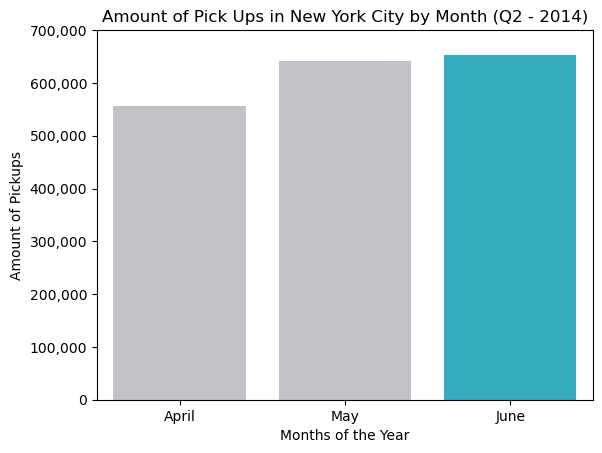

In [75]:
custom_colours1 = ['#C0C0C8', '#C0C0C8', '#1fbad6']

sns.barplot(x = x, y = y, palette = custom_colours1).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q2 - 2014)", yticklabels = ['0', '100,000', '200,000', '300,000',  '400,000',  '500,000', '600,000', '700,000'], ylim = (0,700000));
plt.show()



### PICKUPS BY DAY

In [76]:
days = q1402.copy()


monday = days.query('`day_name` == "Monday"')
tuesday = days.query('`day_name` == "Tuesday"')
wednesday = days.query('`day_name` == "Wednesday"')
thursday = days.query('`day_name` == "Thursday"')
friday = days.query('`day_name` == "Friday"')
saturday = days.query('`day_name` == "Saturday"')
sunday = days.query('`day_name` == "Sunday"')

In [77]:
monday_total = monday.query('`day_name` == "Monday"').value_counts().sum()
tuesday_total = tuesday.query('`day_name` == "Tuesday"').value_counts().sum()
wednesday_total = wednesday.query('`day_name` == "Wednesday"').value_counts().sum()
thursday_total = thursday.query('`day_name` == "Thursday"').value_counts().sum()
friday_total = friday.query('`day_name` == "Friday"').value_counts().sum()
saturday_total = saturday.query('`day_name` == "Saturday"').value_counts().sum()
sunday_total = sunday.query('`day_name` == "Sunday"').value_counts().sum()

print(monday_total, tuesday_total, wednesday_total, thursday_total, friday_total, saturday_total, sunday_total)

216251 252200 293349 324312 324217 257819 184137


In [78]:
day = {'Day' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'Totals' : [monday_total, tuesday_total, wednesday_total,  thursday_total,  friday_total, saturday_total, sunday_total]}

daytotal = pd.DataFrame(day)

print(daytotal)

         Day  Totals
0     Monday  216251
1    Tuesday  252200
2  Wednesday  293349
3   Thursday  324312
4     Friday  324217
5   Saturday  257819
6     Sunday  184137


In [82]:
daytotal

Day  Totals
0     Monday  216251
1    Tuesday  252200
2  Wednesday  293349
3   Thursday  324312
4     Friday  324217
5   Saturday  257819
6     Sunday  184137

In [83]:
x2 = daytotal['Day']
y2 = daytotal['Totals']

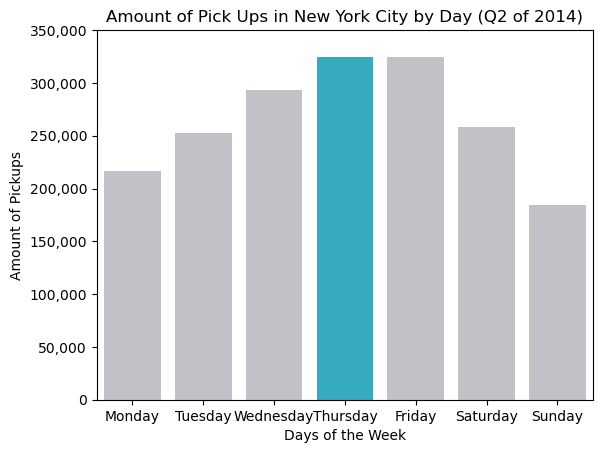

In [84]:
custom_colours2 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8', '#c0c0c8', '#c0c0c8']

sns.barplot(x = x2, y = y2, palette = custom_colours2).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q2 of 2014)", yticklabels = ['0', '50,000', '100,000', '150,000', '200,000', '250,000', '300,000', '350,000',], ylim = (0,350000));
plt.show()

### MOST POPULAR BASE:

In [85]:
q1402.head(2)

date_time      lat      lon    base  hour day_name  month
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     0  Tuesday      4
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     0  Tuesday      4

In [86]:
q1402['base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [87]:
base_1 = q1402.query('`base` == "B02512"') # BASE NAME = UNTER - 40.75258189875482, -74.0065557551885
base_2 = q1402.query('`base` == "B02598"') # BASE NAME = HINTER - 40.75258189875482, -74.0065557551885
base_3 = q1402.query('`base` == "B02617"') # BASE NAME = WEITER - 40.75258189875482, -74.0065557551885
base_4 = q1402.query('`base` == "B02682"') # BASE NAME = SCHMECKEN - 40.75258189875482, -74.0065557551885
base_5 = q1402.query('`base` == "B02764"') # BASE NAME = DANACH - NY - 40.75258189875482, -74.0065557551885


In [88]:
base1total = base_1.value_counts().sum()
base2total = base_2.value_counts().sum()
base3total = base_3.value_counts().sum()
base4total = base_4.value_counts().sum()
base5total = base_5.value_counts().sum()

In [89]:
base = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH'],
        'Totals' : [base1total, base2total, base3total,  base4total,  base5total]}

basetotal = pd.DataFrame(base)

print(basetotal)

       Base  Totals
0     UNTER  101373
1    HINTER  680282
2    WEITER  404007
3  CHMECKEN  638502
4    DANACH   28121


In [90]:
x1 = basetotal['Base']
y1 = basetotal['Totals']

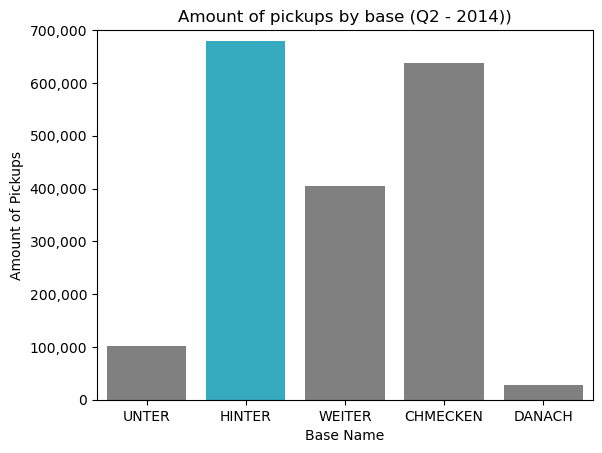

In [91]:
custom_colour3 = ['grey' , '#1fbad6', 'grey', 'grey', 'grey']

sns.barplot(x = x1, y = y1, palette= custom_colour3).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q2 - 2014))", yticklabels = ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000', '700,000', '800,000'], ylim = (0,700000));
plt.show()

### NYC WEATHER

In [92]:
nyc_weather = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\New York Weather (Yearly - 2016)\weather_data_nyc.csv")

In [93]:
nyc_weather.head()

date  maximum temperature  minimum temperature  average temperature  \
0  1-1-2016                   42                   34                 38.0   
1  2-1-2016                   40                   32                 36.0   
2  3-1-2016                   45                   35                 40.0   
3  4-1-2016                   36                   14                 25.0   
4  5-1-2016                   29                   11                 20.0   

  precipitation snow fall snow depth  
0          0.00       0.0          0  
1          0.00       0.0          0  
2          0.00       0.0          0  
3          0.00       0.0          0  
4          0.00       0.0          0

In [94]:
# CLEANING THE DATASET 

nyc_weather.duplicated().sum() # CHECK FOR DUPLICATES

nyc_weather['date'] = pd.to_datetime(nyc_weather['date'], format='mixed', dayfirst=1-1-2016) # Converting the Date column into a datatime data type

nyc_weather = nyc_weather.drop(['snow fall', 'snow depth'], axis = 1) #Removing unwanted columns from DataFrame

nyc_weather.replace('T', 0.0, inplace=True) # Replacing all 'T' values in DataFrame to '0.0' to convert to float value.

nyc_weather['precipitation'] = nyc_weather['precipitation'].astype(float) # Converting precipitation column into a float datatype

nyc_weather['month'] = nyc_weather['date'].dt.month #CONVERT THE DATE COLUMN TO MONTHS


In [95]:
nyc_weather.describe()
nyc_weather.head()

date  maximum temperature  minimum temperature  average temperature  \
0 2016-01-01                   42                   34                 38.0   
1 2016-01-02                   40                   32                 36.0   
2 2016-01-03                   45                   35                 40.0   
3 2016-01-04                   36                   14                 25.0   
4 2016-01-05                   29                   11                 20.0   

   precipitation  month  
0            0.0      1  
1            0.0      1  
2            0.0      1  
3            0.0      1  
4            0.0      1

### NYC WEATHER - MONTHLY RAINFALL

In [96]:
nyc_rain = nyc_weather.copy()

In [97]:
nyc_weather.dtypes

date                   datetime64[ns]
maximum temperature             int64
minimum temperature             int64
average temperature           float64
precipitation                 float64
month                           int32
dtype: object

In [98]:
apr = nyc_weather.query('`month` == 4')
may = nyc_weather.query('`month` == 5')
jun = nyc_weather.query('`month` == 6')
jul = nyc_weather.query('`month` == 7')
aug = nyc_weather.query('`month` == 8')
sep = nyc_weather.query('`month` == 9')

In [99]:
sep.head()

date  maximum temperature  minimum temperature  average temperature  \
244 2016-09-01                   79                   69                 74.0   
245 2016-09-02                   81                   66                 73.5   
246 2016-09-03                   75                   66                 70.5   
247 2016-09-04                   80                   65                 72.5   
248 2016-09-05                   84                   65                 74.5   

     precipitation  month  
244            0.5      9  
245            0.0      9  
246            0.0      9  
247            0.0      9  
248            0.0      9

In [100]:
apr_rain = round(apr['precipitation'].sum(),2)
may_rain = round(may['precipitation'].sum(),2)
jun_rain = round(jun['precipitation'].sum(),2)
jul_rain = round(jul['precipitation'].sum(),2)
aug_rain = round(aug['precipitation'].sum(),2)
sep_rain = round(sep['precipitation'].sum(),2)


In [101]:
print(apr_rain)
print(may_rain)
print(jun_rain)
print(jul_rain)
print(aug_rain)
print(sep_rain)

1.61
3.75
2.6
7.02
1.97
2.79


In [102]:
nyc_rain = {'months' : ['April', 'May', 'June', 'July', 'August', 'September'],
        'total_rain' : [apr_rain, may_rain, jun_rain, jul_rain, aug_rain, sep_rain]}

nyc_rain = pd.DataFrame(nyc_rain)

print(nyc_rain)

      months  total_rain
0      April        1.61
1        May        3.75
2       June        2.60
3       July        7.02
4     August        1.97
5  September        2.79


In [103]:
nyc_rain.head()

months  total_rain
0   April        1.61
1     May        3.75
2    June        2.60
3    July        7.02
4  August        1.97

In [104]:
months_x = nyc_rain['months']
rain_y = nyc_rain['total_rain']

- What colours should be used in 

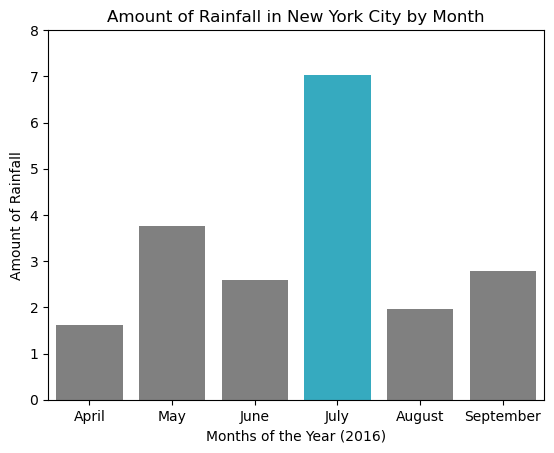

In [105]:
colours_5 = ['grey', 'grey', 'grey', '#1fbad6', 'grey' , 'grey']

sns.barplot(x = months_x, y = rain_y, palette = colours_5  ).set(xlabel = "Months of the Year (2016)", ylabel = "Amount of Rainfall", title = "Amount of Rainfall in New York City by Month", yticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8'], ylim = (0,8));
plt.show()

# LABEL UNITS ON Y AXIS 


NYC WEATHER - TEMP

In [106]:
apr = apr.drop(['precipitation', 'average temperature'], axis = 1)
may = may.drop(['precipitation', 'average temperature'], axis = 1)
jun = jun.drop(['precipitation', 'average temperature'], axis = 1)
jul = jul.drop(['precipitation', 'average temperature'], axis = 1)
aug = aug.drop(['precipitation', 'average temperature'], axis = 1)
sep = sep.drop(['precipitation', 'average temperature'], axis = 1)

In [107]:
apr.head()

date  maximum temperature  minimum temperature  month
91 2016-04-01                   79                   61      4
92 2016-04-02                   61                   49      4
93 2016-04-03                   50                   34      4
94 2016-04-04                   45                   29      4
95 2016-04-05                   43                   26      4

In [112]:
# MAX TEMP 

apr_max = apr['maximum temperature'].max()
may_max = may['maximum temperature'].max()
jun_max = jun['maximum temperature'].max()
jul_max = jul['maximum temperature'].max()
aug_max = aug['maximum temperature'].max()         
sep_max = sep['maximum temperature'].max()

# MIN TEMP

apr_min = apr['minimum temperature'].min()
may_min = may['minimum temperature'].min()
jun_min = jun['minimum temperature'].min()
jul_min = jul['minimum temperature'].min()
aug_min = aug['minimum temperature'].min()
sep_min = sep['minimum temperature'].min()

# AVERAGE TEMP

apr_avg = (apr_max + apr_min) / 2
may_avg = (may_max + may_min) / 2
jun_avg = (jun_max + jun_min) / 2
jul_avg = (jul_max + jul_min) / 2
aug_avg = (aug_max + aug_min) / 2
sep_avg = (sep_max + sep_min) / 2



In [113]:
print(apr_avg)
print(may_avg)
print(jun_avg)
print(jul_avg)
print(aug_avg)
print(sep_avg)

54.0
67.5
70.0
79.5
78.5
72.5


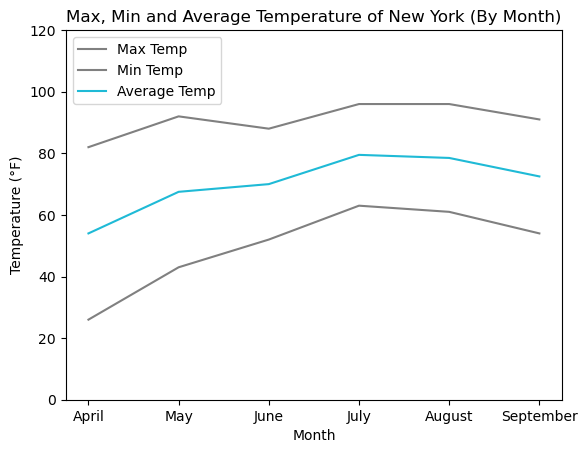

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

colour4 = ['grey', '#1fbad6'] #COLOURS TO UBER COLOUR SCHEME

# Sample data
temp = {
    'x': ['April', 'May', 'June', 'July', 'August', 'September'],
    'y1': [apr_max, may_max, jun_max, jul_max, aug_max, sep_max],
    'y2': [apr_min, may_min, jun_min, jul_min, aug_min, sep_min],
    'y3': [apr_avg, may_avg, jun_avg, jul_avg, aug_avg, sep_avg],
}

# Convert data to a DataFrame
import pandas as pd
nyc_temp = pd.DataFrame(temp)

# Plot multiple lines
sns.lineplot(data=nyc_temp, x='x', y='y1', label='Max Temp', color = colour4[0]).set(title = 'Max, Min and Average Temperature of New York (By Month)', xlabel = 'Month', ylabel = 'Temperature (°F)', yticklabels = ['0', '20', '40', '60', '80', '100', '120'], ylim = (0,120));
sns.lineplot(data=nyc_temp, x='x', y='y2', label='Min Temp', color = colour4[0])
sns.lineplot(data=nyc_temp, x='x', y='y3', label='Average Temp',color = colour4[1])


# Show the plot
plt.legend()
plt.show()

In [116]:
print(apr_max)
print(apr_min)
print(apr_avg)

82
26
54.0


#### 2nd Quarter of 2015 data: 

In [117]:
q1502 = df_2015.copy()

In [118]:
q1502.tail()

Dispatching_base_num          Pickup_date Affiliated_base_num  \
14270474               B02765  2015-05-08 15:43:00              B02765   
14270475               B02765  2015-05-08 15:43:00              B02765   
14270476               B02765  2015-05-08 15:43:00              B02765   
14270477               B02765  2015-05-08 15:44:00              B01899   
14270478               B02765  2015-05-08 15:44:00              B02682   

          locationID  
14270474         186  
14270475         263  
14270476          90  
14270477          45  
14270478         144

In [119]:
q1502.sample(10)

Dispatching_base_num          Pickup_date Affiliated_base_num  \
9837930                B02598  2015-06-03 22:21:00              B02598   
10544812               B02682  2015-06-11 09:51:00              B02682   
883882                 B02764  2015-06-10 17:41:00              B02765   
2782070                B02764  2015-06-14 20:59:00              B02764   
1149804                B02764  2015-01-21 00:01:18              B02764   
4956952                B02682  2015-01-07 09:17:10              B02682   
63264                  B02617  2015-05-17 22:28:00              B02617   
5369678                B02617  2015-02-24 00:01:52              B02617   
4724572                B02764  2015-02-26 13:35:44              B02764   
6692732                B02764  2015-06-29 04:50:00              B02764   

          locationID  
9837930          161  
10544812         141  
883882           230  
2782070          144  
1149804           37  
4956952          113  
63264            229  
5369678           48  
4724572          138  
6692732           95

In [120]:
q1502.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [121]:
q1502.describe()

locationID
count  1.427048e+07
mean   1.520574e+02
std    7.159620e+01
min    1.000000e+00
25%    9.200000e+01
50%    1.570000e+02
75%    2.300000e+02
max    2.650000e+02

In [122]:
q1502.describe(include = 'object')

Dispatching_base_num          Pickup_date Affiliated_base_num
count              14270479             14270479            14108284
unique                    8              2744783                 284
top                  B02764  2015-06-27 22:19:00              B02764
freq                5753653                  213             4352321

#### CLEANING DATA: 

In [123]:
q1502.tail()

Dispatching_base_num          Pickup_date Affiliated_base_num  \
14270474               B02765  2015-05-08 15:43:00              B02765   
14270475               B02765  2015-05-08 15:43:00              B02765   
14270476               B02765  2015-05-08 15:43:00              B02765   
14270477               B02765  2015-05-08 15:44:00              B01899   
14270478               B02765  2015-05-08 15:44:00              B02682   

          locationID  
14270474         186  
14270475         263  
14270476          90  
14270477          45  
14270478         144

In [124]:
q1502.head()

Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90

In [125]:
q1502.shape

(14270479, 4)

In [126]:
q1502.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')

In [127]:
# Dropping thr affiliated base number: 
q1502.drop('Affiliated_base_num', axis = 1, inplace = True)

In [128]:
df_2015.head()

Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90

In [129]:
# Rename the columns of the dataframe:

q1502 = q1502.rename({'Dispatching_base_num':'base_number', 'Pickup_date':'date','locationID':'location_id'}, axis = 1)


In [130]:
q1502.head()

base_number                 date  location_id
0      B02617  2015-05-17 09:47:00          141
1      B02617  2015-05-17 09:47:00           65
2      B02617  2015-05-17 09:47:00          100
3      B02617  2015-05-17 09:47:00           80
4      B02617  2015-05-17 09:47:00           90

In [131]:
q1502.columns

Index(['base_number', 'date', 'location_id'], dtype='object')

In [132]:
q1502.head()

base_number                 date  location_id
0      B02617  2015-05-17 09:47:00          141
1      B02617  2015-05-17 09:47:00           65
2      B02617  2015-05-17 09:47:00          100
3      B02617  2015-05-17 09:47:00           80
4      B02617  2015-05-17 09:47:00           90

In [133]:
q1502 = q1502.reindex(['date', 'base_number', 'location_id'], axis = 1)

In [134]:
q1502.head()

date base_number  location_id
0  2015-05-17 09:47:00      B02617          141
1  2015-05-17 09:47:00      B02617           65
2  2015-05-17 09:47:00      B02617          100
3  2015-05-17 09:47:00      B02617           80
4  2015-05-17 09:47:00      B02617           90

In [135]:
q1502 = q1502.sort_values(by= 'date', ascending = True)

In [136]:
q1502.head()

date base_number  location_id
832778   2015-01-01 00:00:05      B02764          255
90608    2015-01-01 00:00:05      B02598          144
9371715  2015-01-01 00:00:08      B02682          113
9368311  2015-01-01 00:00:11      B02682          234
1084752  2015-01-01 00:00:13      B02764          232

In [137]:
#RESETTING INDEX OF DATAFRAME AFTER ORDER THE DATAFRAME BY DATE: 
q1502.reset_index(0, inplace= True)

In [138]:
# Dropping the index column from the dataframe: 
q1502.drop('index', axis = 1, inplace = True)

In [139]:
q1502.head()

date base_number  location_id
0  2015-01-01 00:00:05      B02764          255
1  2015-01-01 00:00:05      B02598          144
2  2015-01-01 00:00:08      B02682          113
3  2015-01-01 00:00:11      B02682          234
4  2015-01-01 00:00:13      B02764          232

In [140]:
q1502.tail()

date base_number  location_id
14270474  2015-06-30 23:59:00      B02764          246
14270475  2015-06-30 23:59:00      B02764           90
14270476  2015-06-30 23:59:00      B02764          148
14270477  2015-06-30 23:59:00      B02764          231
14270478  2015-06-30 23:59:00      B02682           88

In [141]:
# Checking the dataframe columns: 

q1502.dtypes

date           object
base_number    object
location_id     int64
dtype: object

In [142]:
# Changing date column to a datetime column: 

q1502['date'] = pd.to_datetime(q1502['date'])

In [143]:
q1502.dtypes

date           datetime64[ns]
base_number            object
location_id             int64
dtype: object

In [144]:
# EXTRACTING MONTH NAME: 

q1502['month'] = q1502['date'].dt.month_name()

In [145]:
# EXTRACTING DAY_NAME: 

q1502['day_name'] = q1502['date'].dt.day_name()


In [146]:
# EXTRACTING HOUR: 

q1502['hour'] = q1502['date'].dt.hour

In [147]:
# EXTRACTING DAY: 

q1502['day'] = q1502['date'].dt.day

In [148]:
q1402.head()

date_time      lat      lon    base  hour day_name  month
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     0  Tuesday      4
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     0  Tuesday      4
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512     0  Tuesday      4
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512     0  Tuesday      4
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512     0  Tuesday      4

In [149]:
# EXTRACTING DAY:

q1402['day'] = q1402['date_time'].dt.day

In [150]:
# CHECKING FOR DUPLICIATE VALUES
q1502.duplicated().sum()

1440372

In [151]:
#DROPPING DUPLICATE VALUES: 
q1502.drop_duplicates(inplace = True)

In [152]:
q1502.shape

(12830107, 7)

In [153]:
# CHECKING DATAFRAME FOR NULL VALUES: 
q1502.isnull().sum()

date           0
base_number    0
location_id    0
month          0
day_name       0
hour           0
day            0
dtype: int64

In [154]:
q1502.head()

date base_number  location_id    month  day_name  hour  day
0 2015-01-01 00:00:05      B02764          255  January  Thursday     0    1
1 2015-01-01 00:00:05      B02598          144  January  Thursday     0    1
2 2015-01-01 00:00:08      B02682          113  January  Thursday     0    1
3 2015-01-01 00:00:11      B02682          234  January  Thursday     0    1
4 2015-01-01 00:00:13      B02764          232  January  Thursday     0    1

#### SPLITTING UP DATES 

In [155]:
q1502.head()

date base_number  location_id    month  day_name  hour  day
0 2015-01-01 00:00:05      B02764          255  January  Thursday     0    1
1 2015-01-01 00:00:05      B02598          144  January  Thursday     0    1
2 2015-01-01 00:00:08      B02682          113  January  Thursday     0    1
3 2015-01-01 00:00:11      B02682          234  January  Thursday     0    1
4 2015-01-01 00:00:13      B02764          232  January  Thursday     0    1

In [156]:
# RE-INDEXING COLUMNS FOR THE DATAFRAME AFTER ADDING ADDITIONAL COLUMNS:
q1502 = q1502.reindex(['date', 'month', 'day', 'day_name', 'hour', 'base_number', 'location_id'], axis = 1)

In [157]:
q1502.shape

(12830107, 7)

In [158]:
#EXTRACT THE SECOND QUARTER FROM THE DATASET BY MONTHS: 
 
df_1504 = q1502.query('`month` == "April"')
df_1505 = q1502.query('`month` == "May"')
df_1506 = q1502.query('`month` == "June"')



In [ ]:
#CHECKING NEW DATAFRAMES CREATED: 

In [159]:
df_1504

date  month  day   day_name  hour base_number  \
6477194 2015-04-01 00:01:00  April    1  Wednesday     0      B02598   
6477195 2015-04-01 00:02:00  April    1  Wednesday     0      B02764   
6477196 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477197 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477198 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
...                     ...    ...  ...        ...   ...         ...   
8758022 2015-04-30 23:59:00  April   30   Thursday    23      B02765   
8758023 2015-04-30 23:59:00  April   30   Thursday    23      B02765   
8758024 2015-04-30 23:59:00  April   30   Thursday    23      B02764   
8758026 2015-04-30 23:59:00  April   30   Thursday    23      B02764   
8758028 2015-04-30 23:59:00  April   30   Thursday    23      B02764   

         location_id  
6477194          158  
6477195          148  
6477196           45  
6477197          231  
6477198          234  
...              ...  
8758022           90  
8758023           68  
8758024          158  
8758026          231  
8758028          114  

[1991220 rows x 7 columns]

In [160]:
df_1505

date month  day day_name  hour base_number  \
8758031  2015-05-01 00:00:00   May    1   Friday     0      B02764   
8758032  2015-05-01 00:00:00   May    1   Friday     0      B02682   
8758033  2015-05-01 00:01:00   May    1   Friday     0      B02682   
8758034  2015-05-01 00:01:00   May    1   Friday     0      B02682   
8758035  2015-05-01 00:01:00   May    1   Friday     0      B02682   
...                      ...   ...  ...      ...   ...         ...   
11453578 2015-05-31 23:59:00   May   31   Sunday    23      B02598   
11453579 2015-05-31 23:59:00   May   31   Sunday    23      B02598   
11453581 2015-05-31 23:59:00   May   31   Sunday    23      B02765   
11453582 2015-05-31 23:59:00   May   31   Sunday    23      B02765   
11453583 2015-05-31 23:59:00   May   31   Sunday    23      B02617   

          location_id  
8758031            79  
8758032           255  
8758033           112  
8758034           148  
8758035           114  
...               ...  
11453578          106  
11453579           31  
11453581           95  
11453582          164  
11453583          231  

[2338203 rows x 7 columns]

In [161]:
df_1506

date month  day day_name  hour base_number  \
11453584 2015-06-01 00:02:00  June    1   Monday     0      B02682   
11453585 2015-06-01 00:02:00  June    1   Monday     0      B02598   
11453586 2015-06-01 00:02:00  June    1   Monday     0      B02598   
11453587 2015-06-01 00:02:00  June    1   Monday     0      B02764   
11453588 2015-06-01 00:03:00  June    1   Monday     0      B02617   
...                      ...   ...  ...      ...   ...         ...   
14270471 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270472 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270473 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270474 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270478 2015-06-30 23:59:00  June   30  Tuesday    23      B02682   

          location_id  
11453584          186  
11453585          142  
11453586          114  
11453587           48  
11453588          188  
...               ...  
14270471          161  
14270472           80  
14270473          255  
14270474          246  
14270478           88  

[2421775 rows x 7 columns]

In [162]:
print(df_1504.value_counts().sum())
print(df_1505.value_counts().sum())
print(df_1506.value_counts().sum())


1991220
2338203
2421775


In [163]:
print(df_1504.value_counts().sum())
print(df_1505.value_counts().sum())
print(df_1506.value_counts().sum())

1991220
2338203
2421775


#### EDA: 

In [164]:
#Concat dataframe for Q2 in 2015: 

q215 = pd.DataFrame()

q215 = pd.concat([df_1504, df_1505, df_1506])

q215.shape # Checking the new concat dataframe called 'Q215' 

(6751198, 7)

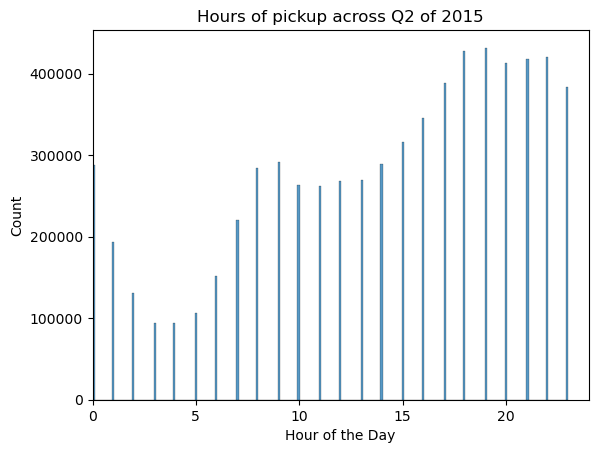

In [165]:
#Creating a Histogram in Seaborn: 

# Histogram to check hours - Q2 2015

sns.histplot(q215['hour'], palette = '#1fbad6')
plt.xlim(0,24)
plt.xlabel('Hour of the Day')
plt.title('Hours of pickup across Q2 of 2015')
plt.show();


In [166]:
# Histogram to check hours - Q1 2015

sns.histplot(q115['hour'], palette = '#1fbad6')
plt.xlim(0,24)
plt.xlabel('Hour of the Day')
plt.title('Hours of pickup across Q1 of 2015')
plt.show();

NameError: name 'q115' is not defined

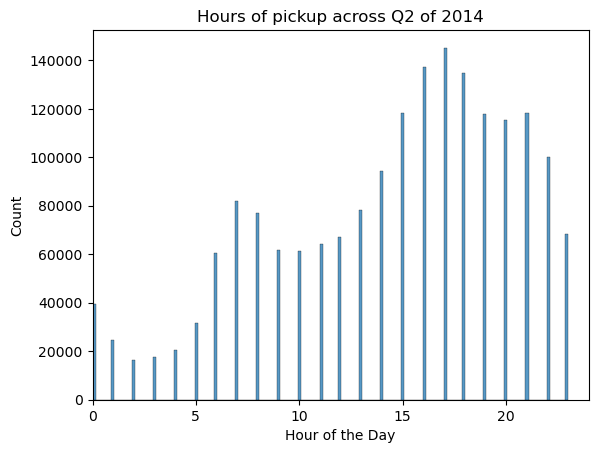

In [167]:
# Histogram to check hours - Q2 2014

sns.histplot(q1402['hour'], palette = '#1fbad6')
plt.xlim(0,24)
plt.xlabel('Hour of the Day')
plt.title('Hours of pickup across Q2 of 2014')
plt.show();

In [168]:
# Histogram to check days:

days_2015 = q215.groupby(['hour','day_name']).size().unstack()
days_reindex = days_2015.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [169]:
days_reindex.style.background_gradient()

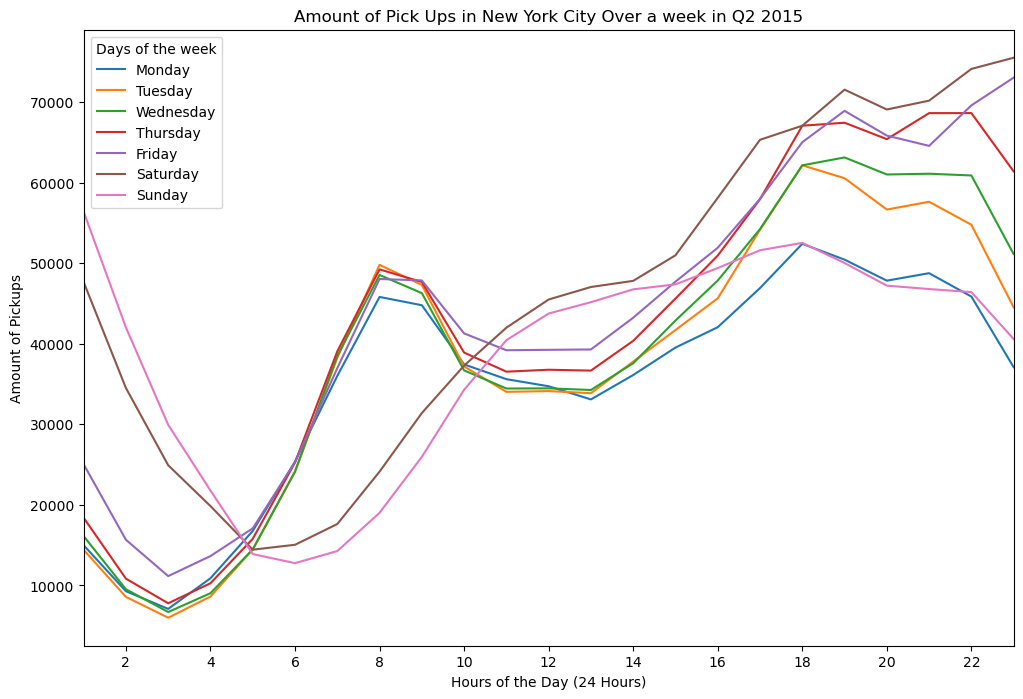

In [170]:
#custom_thurs = ['#2D2D2D', '#C0C0C8', '#C0C0C8', '#1fbad6', '#C0C0C8', '#C0C0C8', '#C0C0C8']


plt.figure(figsize=(12,8))
sns.lineplot(data=days_reindex, dashes = False).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City Over a week in Q2 2015", xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()

#### MOST POPULAR UBER BASE (Q2 - 2015)

In [171]:
q215.shape 

(6751198, 7)

In [172]:
q215.base_number.unique()

array(['B02598', 'B02764', 'B02682', 'B02765', 'B02617', 'B02512',
       'B02836', 'B02835'], dtype=object)

In [173]:
#BREAKDOWN OF EACH BASE 
base_151 = q215.query('`base_number` == "B02512"') # BASE NAME = UNTER - 40.75258189875482, -74.0065557551885
base_152 = q215.query('`base_number` == "B02598"') # BASE NAME = HINTER - 40.75258189875482, -74.0065557551885
base_153 = q215.query('`base_number` == "B02617"') # BASE NAME = WEITER - 40.75258189875482, -74.0065557551885
base_154 = q215.query('`base_number` == "B02682"') # BASE NAME = SCHMECKEN - 40.75258189875482, -74.0065557551885
base_155 = q215.query('`base_number` == "B02764"') # BASE NAME = DANACH - NY - 40.75258189875482, -74.0065557551885
base_156 = q215.query('`base_number` == "B02765"') # BASE NAME = GRUN
base_157 = q215.query('`base_number` == "B02836"') # BASE NAME = DRINNEN 
base_158 = q215.query('`base_number` == "B02835"') # BASE NAME = DREIST 

In [174]:
b1 = base_151.value_counts().sum()
b2 = base_152.value_counts().sum()
b3 = base_153.value_counts().sum()
b4 = base_154.value_counts().sum()
b5 = base_155.value_counts().sum()
b6 = base_156.value_counts().sum()
b7 = base_157.value_counts().sum()
b8 = base_158.value_counts().sum()

In [175]:
print(b1)
print(b2)
print(b3)
print(b4)
print(b5)
print(b6)
print(b7)
print(b8)

103413
689467
900258
2015134
2315878
698637
1990
26421


In [176]:
bases = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH', 'GRUN', 'DRINNEN', 'DREIST'],
        'Totals' : [b1, b2, b3,  b4,  b5,  b6, b7, b8]}

bases15 = pd.DataFrame(bases)

In [177]:
bases15

Base   Totals
0     UNTER   103413
1    HINTER   689467
2    WEITER   900258
3  CHMECKEN  2015134
4    DANACH  2315878
5      GRUN   698637
6   DRINNEN     1990
7    DREIST    26421

In [178]:
x151 = bases15['Base']
y151 = bases15['Totals']

#### MOST POPULAR BASE (Q2 - 2015)

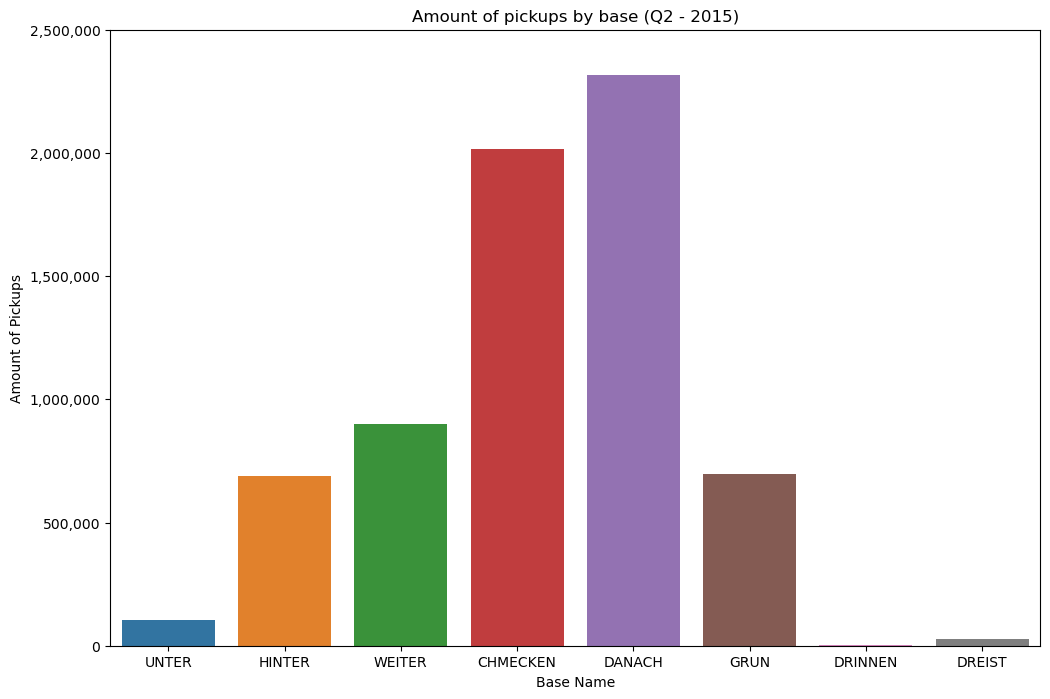

In [179]:
plt.figure(figsize= (12,8))
sns.barplot(x = x151, y = y151, data = bases15).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q2 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000'], yticks = [0, 500000, 1000000, 1500000, 2000000, 2500000], ylim = (0,2500000));
plt.show()

#### MOST POPULAR MONTH FOR PICK UPS

In [180]:
# CREATING A NEW DATA FRAME CALLED DAYS_15 
days_15 = q215.copy()

In [181]:
q215.head()

date  month  day   day_name  hour base_number  \
6477194 2015-04-01 00:01:00  April    1  Wednesday     0      B02598   
6477195 2015-04-01 00:02:00  April    1  Wednesday     0      B02764   
6477196 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477197 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477198 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   

         location_id  
6477194          158  
6477195          148  
6477196           45  
6477197          231  
6477198          234

In [182]:
q215.tail()

date month  day day_name  hour base_number  \
14270471 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270472 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270473 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270474 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270478 2015-06-30 23:59:00  June   30  Tuesday    23      B02682   

          location_id  
14270471          161  
14270472           80  
14270473          255  
14270474          246  
14270478           88

In [183]:
q215.shape

(6751198, 7)

In [184]:
days_15.head()

date  month  day   day_name  hour base_number  \
6477194 2015-04-01 00:01:00  April    1  Wednesday     0      B02598   
6477195 2015-04-01 00:02:00  April    1  Wednesday     0      B02764   
6477196 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477197 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477198 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   

         location_id  
6477194          158  
6477195          148  
6477196           45  
6477197          231  
6477198          234

In [185]:
mon15 = days_15.query('`day_name` == "Monday"')
tues15 = days_15.query('`day_name` == "Tuesday"')
wed15 = days_15.query('`day_name` == "Tuesday"')
thur15 = days_15.query('`day_name` == "Thursday"') 
fri15 = days_15.query('`day_name` == "Friday"') 
sat15 = days_15.query('`day_name` == "Saturday"') 
sun15 = days_15.query('`day_name` == "Sunday"') 

In [186]:
print(len(mon15))
print(len(tues15))
print(len(wed15))
print(len(thur15))
print(len(fri15))
print(len(sat15))
print(len(sun15))

824191
890691
890691
999315
1050842
1115726
946419


In [187]:
total_mon = len(mon15)
total_tues = len(tues15)
total_wed = len(wed15)
total_thur = len(thur15)
total_fri = len(fri15)
total_sat = len(sat15)
total_sun = len(sun15)

In [188]:
# Creating a data frame for the most popular weekday for pick ups

day_of_week = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'count': [total_mon, total_tues, total_wed, total_thur, total_fri, total_sat, total_sun],
}

# Convert data to a DataFrame
most_pop_day = pd.DataFrame(day_of_week)

In [189]:
most_pop_day

day_of_week    count
0      Monday   824191
1     Tuesday   890691
2   Wednesday   890691
3    Thursday   999315
4      Friday  1050842
5    Saturday  1115726
6      Sunday   946419

In [190]:
xa = most_pop_day['day_of_week']
ya = most_pop_day['count']

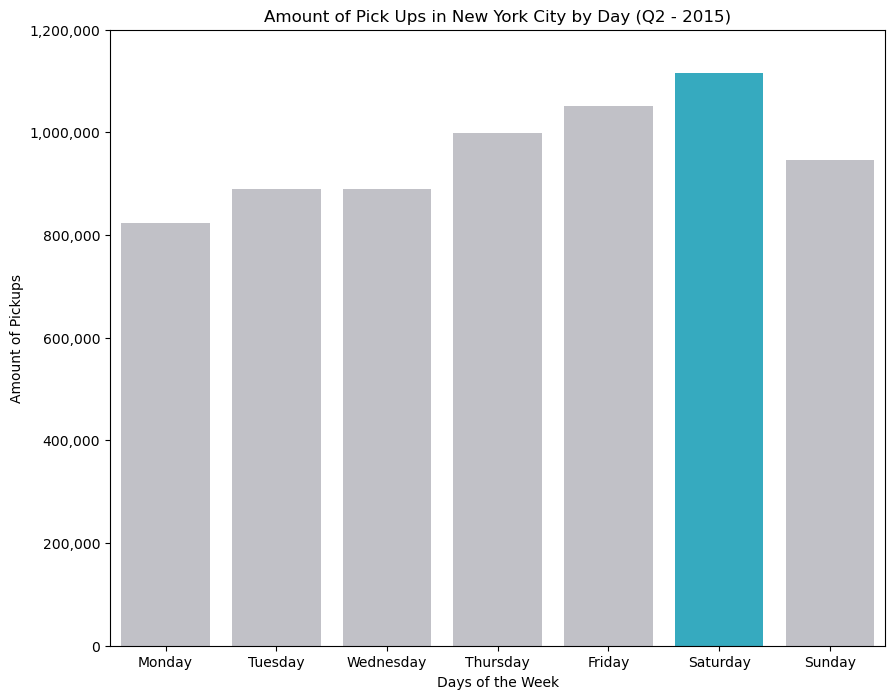

In [191]:
custom_colours6 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = xa, y = ya, palette = custom_colours6).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q2 - 2015)", yticklabels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', ], ylim = (0,1200000));
plt.show()

MOST POPULAR MONTH: 

In [192]:
df_0414.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [193]:
df_0414.tail()

Date/Time      Lat      Lon    Base
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

In [194]:
df_1504


date  month  day   day_name  hour base_number  \
6477194 2015-04-01 00:01:00  April    1  Wednesday     0      B02598   
6477195 2015-04-01 00:02:00  April    1  Wednesday     0      B02764   
6477196 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477197 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477198 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
...                     ...    ...  ...        ...   ...         ...   
8758022 2015-04-30 23:59:00  April   30   Thursday    23      B02765   
8758023 2015-04-30 23:59:00  April   30   Thursday    23      B02765   
8758024 2015-04-30 23:59:00  April   30   Thursday    23      B02764   
8758026 2015-04-30 23:59:00  April   30   Thursday    23      B02764   
8758028 2015-04-30 23:59:00  April   30   Thursday    23      B02764   

         location_id  
6477194          158  
6477195          148  
6477196           45  
6477197          231  
6477198          234  
...              ...  
8758022           90  
8758023           68  
8758024          158  
8758026          231  
8758028          114  

[1991220 rows x 7 columns]

In [195]:
apr_15 = len(df_1504)
may_15 = len(df_1505)
jun_15 = len(df_1506)

In [196]:
apr_15

1991220

In [197]:
pop_month = {
    'month': ['April', 'May', 'June'],
    'count': [apr_15, may_15, jun_15],
}

# Convert data to a DataFrame
most_pop_month = pd.DataFrame(pop_month)

In [198]:
most_pop_month.head()

month    count
0  April  1991220
1    May  2338203
2   June  2421775

In [199]:
xb = most_pop_month['month']
yb = most_pop_month['count']

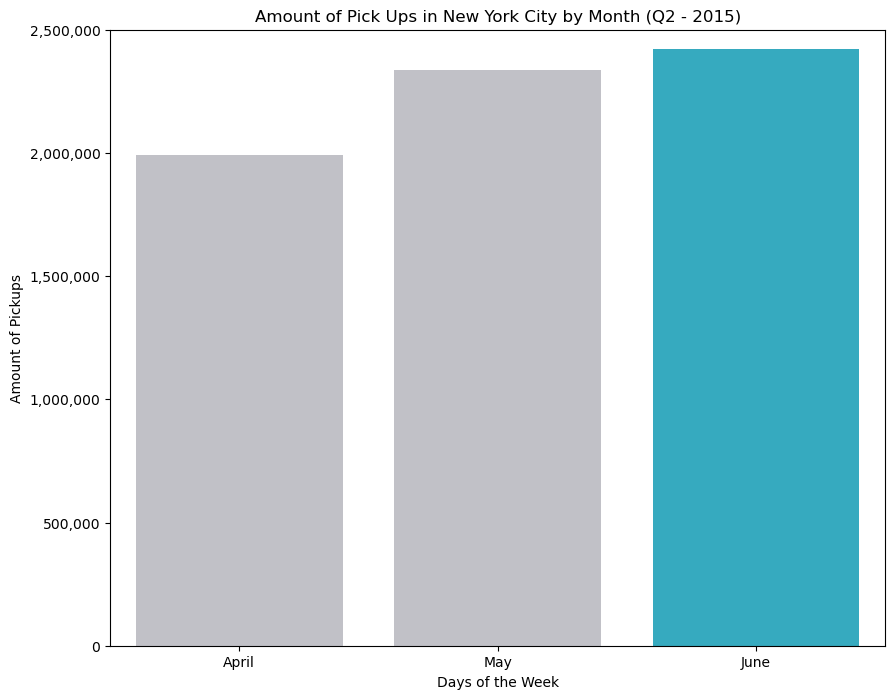

In [200]:
custom_colours7 = ['#c0c0c8', '#c0c0c8', '#1fbad6']

plt.figure(figsize= (10,8))
sns.barplot(x = xb, y = yb, palette=custom_colours7).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q2 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

LINE PLOT PICK-UPS ON A MONTH BASIS - Q2 2014 / Q2 2015

In [201]:
data_3 = {
    'month': ['April', 'May', 'June'],
    'count_14': [556767, 642360, 653158],
    'count_15': [apr_15, may_15, jun_15]
}

# Convert data to a DataFrame
comp_month_graph = pd.DataFrame(data_3)

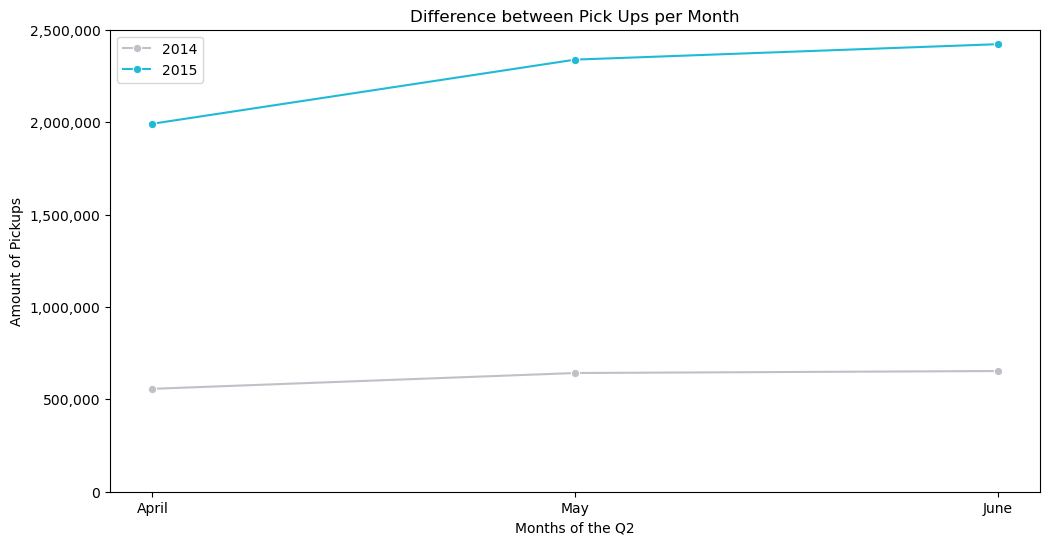

In [202]:
pickup = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000']
pickups = [0, 500000, 1000000, 1500000, 2000000, 2500000]
uber_blue = '#1fbad6'
uber_grey = '#c0c0c8'

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = comp_month_graph.month,  y=comp_month_graph['count_14'], data=comp_month_graph, label = '2014', marker = 'o', color = uber_grey).set()
ax = sns.lineplot(x = comp_month_graph.month,  y=comp_month_graph['count_15'], data=comp_month_graph, label = '2015', marker = 'o', color = uber_blue)
plt.title('Difference between Pick Ups per Month')
plt.ylabel('Amount of Pickups')
plt.xlabel('Months of the Q2')
plt.yticks(pickups, pickup)
plt.ylim(0, 2500000)
plt.legend()
plt.show();

#### CREATING 1ST QUARTER  - 2015 DATAFRAME 

In [203]:
q1502.head()

date    month  day  day_name  hour base_number  location_id
0 2015-01-01 00:00:05  January    1  Thursday     0      B02764          255
1 2015-01-01 00:00:05  January    1  Thursday     0      B02598          144
2 2015-01-01 00:00:08  January    1  Thursday     0      B02682          113
3 2015-01-01 00:00:11  January    1  Thursday     0      B02682          234
4 2015-01-01 00:00:13  January    1  Thursday     0      B02764          232

In [204]:
df_2015 = q1502.copy()

In [205]:
df_2015.columns

Index(['date', 'month', 'day', 'day_name', 'hour', 'base_number',
       'location_id'],
      dtype='object')

In [206]:
df_2015.sort_values(by='date', ascending= True, inplace = True)

In [207]:
df_2015.head()

date    month  day  day_name  hour base_number  location_id
0 2015-01-01 00:00:05  January    1  Thursday     0      B02764          255
1 2015-01-01 00:00:05  January    1  Thursday     0      B02598          144
2 2015-01-01 00:00:08  January    1  Thursday     0      B02682          113
3 2015-01-01 00:00:11  January    1  Thursday     0      B02682          234
4 2015-01-01 00:00:13  January    1  Thursday     0      B02764          232

In [208]:
df_2015.shape

(12830107, 7)

In [209]:
df_2015.duplicated().sum() # CHECKING HOW MANY DUPLICATE VALUES ARE IN THE NEW DATAFRAMEdf_2015
df_2015.drop_duplicates(inplace = True) #DROPPING DUPLICATE VALUES IN DATAFRAME
df_2015.shape # CHECKING DUPLICATE VALUES HAVE BEEN REMOVED FROM DATAFRAME


(12830107, 7)

In [210]:
df_2015.isnull().sum()

date           0
month          0
day            0
day_name       0
hour           0
base_number    0
location_id    0
dtype: int64

In [211]:
df_2015.dropna(inplace = True) 

In [212]:
df_2015.dtypes

date           datetime64[ns]
month                  object
day                     int32
day_name               object
hour                    int32
base_number            object
location_id             int64
dtype: object

In [213]:
df_2015['Pickup_date'] = pd.to_datetime(df_2015['date'])

In [214]:
df_2015['hours'] = df_2015['Pickup_date'].dt.hour

In [215]:
df_2015['month'] = df_2015['Pickup_date'].dt.month

In [216]:
df_2015['day_name'] = df_2015['Pickup_date'].dt.day_name()

In [217]:
df_2015.dtypes

date           datetime64[ns]
month                   int32
day                     int32
day_name               object
hour                    int32
base_number            object
location_id             int64
Pickup_date    datetime64[ns]
hours                   int32
dtype: object

In [218]:
df_2015.head()

date  month  day  day_name  hour base_number  location_id  \
0 2015-01-01 00:00:05      1    1  Thursday     0      B02764          255   
1 2015-01-01 00:00:05      1    1  Thursday     0      B02598          144   
2 2015-01-01 00:00:08      1    1  Thursday     0      B02682          113   
3 2015-01-01 00:00:11      1    1  Thursday     0      B02682          234   
4 2015-01-01 00:00:13      1    1  Thursday     0      B02764          232   

          Pickup_date  hours  
0 2015-01-01 00:00:05      0  
1 2015-01-01 00:00:05      0  
2 2015-01-01 00:00:08      0  
3 2015-01-01 00:00:11      0  
4 2015-01-01 00:00:13      0

In [219]:
df_2015.rename({'Pickup_date':'date', 'Dispatching_base_num': 'base', 'locationID':'location_id', 'month':'month', 'day_name':'day_name', 'hours':'hours'}, axis = 1, inplace= True)

In [220]:
df_2015.head()

date  month  day  day_name  hour base_number  location_id  \
0 2015-01-01 00:00:05      1    1  Thursday     0      B02764          255   
1 2015-01-01 00:00:05      1    1  Thursday     0      B02598          144   
2 2015-01-01 00:00:08      1    1  Thursday     0      B02682          113   
3 2015-01-01 00:00:11      1    1  Thursday     0      B02682          234   
4 2015-01-01 00:00:13      1    1  Thursday     0      B02764          232   

                 date  hours  
0 2015-01-01 00:00:05      0  
1 2015-01-01 00:00:05      0  
2 2015-01-01 00:00:08      0  
3 2015-01-01 00:00:11      0  
4 2015-01-01 00:00:13      0

In [222]:
df_2015 = df_2015.reindex(['date', 'base', 'location_id', 'month', 'day_name', 'hours'], axis = 1)

ValueError: cannot reindex on an axis with duplicate labels

In [223]:
df_2015.head()

date  month  day  day_name  hour base_number  location_id  \
0 2015-01-01 00:00:05      1    1  Thursday     0      B02764          255   
1 2015-01-01 00:00:05      1    1  Thursday     0      B02598          144   
2 2015-01-01 00:00:08      1    1  Thursday     0      B02682          113   
3 2015-01-01 00:00:11      1    1  Thursday     0      B02682          234   
4 2015-01-01 00:00:13      1    1  Thursday     0      B02764          232   

                 date  hours  
0 2015-01-01 00:00:05      0  
1 2015-01-01 00:00:05      0  
2 2015-01-01 00:00:08      0  
3 2015-01-01 00:00:11      0  
4 2015-01-01 00:00:13      0

In [224]:
df_2015.reset_index(0, inplace = True)

In [225]:
df_2015.drop('index', axis = 1, inplace = True)

In [226]:
df_2015.head()

date  month  day  day_name  hour base_number  location_id  \
0 2015-01-01 00:00:05      1    1  Thursday     0      B02764          255   
1 2015-01-01 00:00:05      1    1  Thursday     0      B02598          144   
2 2015-01-01 00:00:08      1    1  Thursday     0      B02682          113   
3 2015-01-01 00:00:11      1    1  Thursday     0      B02682          234   
4 2015-01-01 00:00:13      1    1  Thursday     0      B02764          232   

                 date  hours  
0 2015-01-01 00:00:05      0  
1 2015-01-01 00:00:05      0  
2 2015-01-01 00:00:08      0  
3 2015-01-01 00:00:11      0  
4 2015-01-01 00:00:13      0

#### GETTING 2015 Q1 DATA: 

In [227]:
jan15 = df_2015.query('`month` == 1')
feb15 = df_2015.query('`month` == 2')
mar15 = df_2015.query('`month` == 3')

In [228]:
# Checking new dataframes created 
jan15.head()
jan15.tail()
feb15.head()
feb15.tail()
mar15.head()
mar15.tail()

date  month  day day_name  hour base_number  \
6078904 2015-03-31 23:59:00      3   31  Tuesday    23      B02598   
6078905 2015-03-31 23:59:00      3   31  Tuesday    23      B02598   
6078906 2015-03-31 23:59:00      3   31  Tuesday    23      B02598   
6078907 2015-03-31 23:59:00      3   31  Tuesday    23      B02617   
6078908 2015-03-31 23:59:00      3   31  Tuesday    23      B02617   

         location_id                date  hours  
6078904           41 2015-03-31 23:59:00     23  
6078905          163 2015-03-31 23:59:00     23  
6078906          142 2015-03-31 23:59:00     23  
6078907          200 2015-03-31 23:59:00     23  
6078908          113 2015-03-31 23:59:00     23

In [229]:
jan_15 = len(jan15)
feb_15 = len(feb15)
mar_15 = len(mar15)

In [230]:
print(len(jan15))
print(len(feb15))
print(len(mar15))

1916557
2218800
1943552


In [231]:
q115_month = {
    'month': ['January', 'February', 'March'],
    'count': [jan_15, feb_15, mar_15],
}

# Convert data to a DataFrame
q1_15_month  = pd.DataFrame(q115_month)

In [232]:
q1_15_month.head()

month    count
0   January  1916557
1  February  2218800
2     March  1943552

In [233]:
xc = q1_15_month['month']
yc = q1_15_month['count']

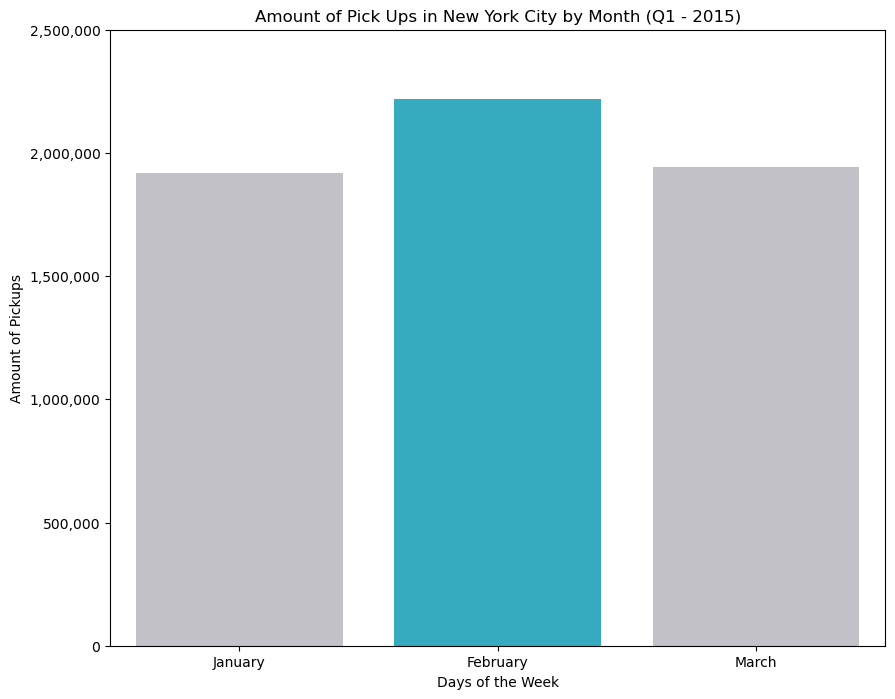

In [234]:
#CREATING A BARPLOT

custom_q15 = ['#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = xc, y = yc, palette=custom_q15).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q1 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()



#### Q1 - 2015 - Dataframe

In [235]:
jan15 = df_2015.query('`month` == 1')
feb15 = df_2015.query('`month` == 2')
mar15 = df_2015.query('`month` == 3')

In [236]:
#Concat dataframe for Q2 in 2015: 

q115 = pd.DataFrame()

q115 = pd.concat([jan15, feb15, mar15])

q115.shape # Checking the new concat dataframe called 'Q115' 

(6078909, 9)

In [237]:
q115.head()

date  month  day  day_name  hour base_number  location_id  \
0 2015-01-01 00:00:05      1    1  Thursday     0      B02764          255   
1 2015-01-01 00:00:05      1    1  Thursday     0      B02598          144   
2 2015-01-01 00:00:08      1    1  Thursday     0      B02682          113   
3 2015-01-01 00:00:11      1    1  Thursday     0      B02682          234   
4 2015-01-01 00:00:13      1    1  Thursday     0      B02764          232   

                 date  hours  
0 2015-01-01 00:00:05      0  
1 2015-01-01 00:00:05      0  
2 2015-01-01 00:00:08      0  
3 2015-01-01 00:00:11      0  
4 2015-01-01 00:00:13      0

In [238]:
q115.tail()

date  month  day day_name  hour base_number  \
6078904 2015-03-31 23:59:00      3   31  Tuesday    23      B02598   
6078905 2015-03-31 23:59:00      3   31  Tuesday    23      B02598   
6078906 2015-03-31 23:59:00      3   31  Tuesday    23      B02598   
6078907 2015-03-31 23:59:00      3   31  Tuesday    23      B02617   
6078908 2015-03-31 23:59:00      3   31  Tuesday    23      B02617   

         location_id                date  hours  
6078904           41 2015-03-31 23:59:00     23  
6078905          163 2015-03-31 23:59:00     23  
6078906          142 2015-03-31 23:59:00     23  
6078907          200 2015-03-31 23:59:00     23  
6078908          113 2015-03-31 23:59:00     23

#### Q1/Q2 2015 - Most Popular Month

In [239]:
q1215_month = {
    'month': ['January', 'February', 'March','April', 'May', 'June'],
    'count': [jan_15, feb_15, mar_15, apr_15, may_15, jun_15],
}

# Convert data to a DataFrame
q12_15_month  = pd.DataFrame(q1215_month)

In [240]:
q12_15_month.head()

month    count
0   January  1916557
1  February  2218800
2     March  1943552
3     April  1991220
4       May  2338203

In [241]:
xd = q12_15_month['month']
yd = q12_15_month['count']

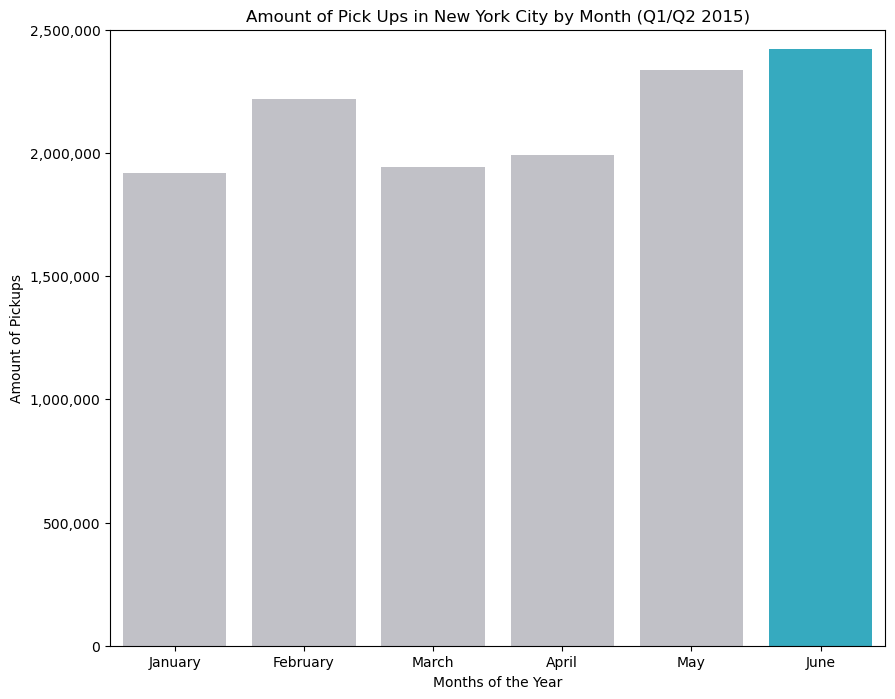

In [242]:
cc1 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6']


plt.figure(figsize= (10,8))
sns.barplot(x = xd, y = yd, palette = cc1).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q1/Q2 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

In [243]:
df_2015.head()

date  month  day  day_name  hour base_number  location_id  \
0 2015-01-01 00:00:05      1    1  Thursday     0      B02764          255   
1 2015-01-01 00:00:05      1    1  Thursday     0      B02598          144   
2 2015-01-01 00:00:08      1    1  Thursday     0      B02682          113   
3 2015-01-01 00:00:11      1    1  Thursday     0      B02682          234   
4 2015-01-01 00:00:13      1    1  Thursday     0      B02764          232   

                 date  hours  
0 2015-01-01 00:00:05      0  
1 2015-01-01 00:00:05      0  
2 2015-01-01 00:00:08      0  
3 2015-01-01 00:00:11      0  
4 2015-01-01 00:00:13      0

In [244]:
q115 = pd.DataFrame() 

df_q115 = pd.concat([jan15,feb15,mar15,q115])

print(df_q115)

                       date  month  day  day_name  hour base_number  \
0       2015-01-01 00:00:05      1    1  Thursday     0      B02764   
1       2015-01-01 00:00:05      1    1  Thursday     0      B02598   
2       2015-01-01 00:00:08      1    1  Thursday     0      B02682   
3       2015-01-01 00:00:11      1    1  Thursday     0      B02682   
4       2015-01-01 00:00:13      1    1  Thursday     0      B02764   
...                     ...    ...  ...       ...   ...         ...   
6078904 2015-03-31 23:59:00      3   31   Tuesday    23      B02598   
6078905 2015-03-31 23:59:00      3   31   Tuesday    23      B02598   
6078906 2015-03-31 23:59:00      3   31   Tuesday    23      B02598   
6078907 2015-03-31 23:59:00      3   31   Tuesday    23      B02617   
6078908 2015-03-31 23:59:00      3   31   Tuesday    23      B02617   

         location_id                date  hours  
0                255 2015-01-01 00:00:05      0  
1                144 2015-01-01 00:00:05      0

In [245]:
q115_time = df_q115.groupby(['hours','day_name']).size().unstack()
q115_time_reindex = q115_time.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
q115_time_reindex.style.background_gradient()

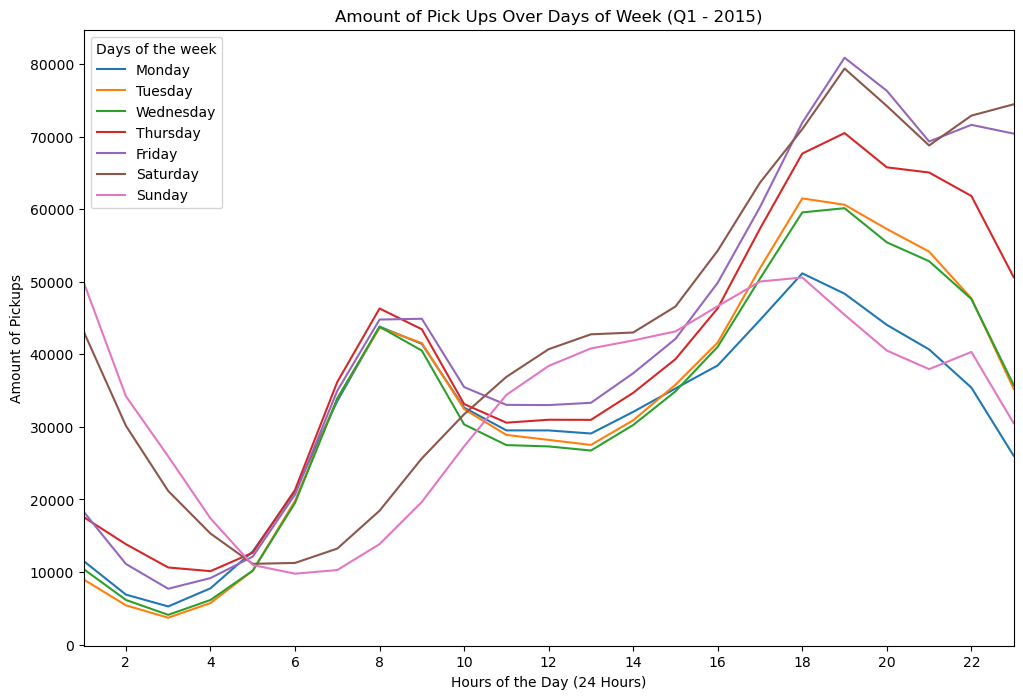

In [246]:
plt.figure(figsize=(12,8))
sns.lineplot(data=q115_time_reindex, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups Over Days of Week (Q1 - 2015)",  xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()

#### HEATMAP BY DAY NUMBER AND HOUR - Q1 2015

In [247]:
df_q115.head()

date  month  day  day_name  hour base_number  location_id  \
0 2015-01-01 00:00:05      1    1  Thursday     0      B02764          255   
1 2015-01-01 00:00:05      1    1  Thursday     0      B02598          144   
2 2015-01-01 00:00:08      1    1  Thursday     0      B02682          113   
3 2015-01-01 00:00:11      1    1  Thursday     0      B02682          234   
4 2015-01-01 00:00:13      1    1  Thursday     0      B02764          232   

                 date  hours  
0 2015-01-01 00:00:05      0  
1 2015-01-01 00:00:05      0  
2 2015-01-01 00:00:08      0  
3 2015-01-01 00:00:11      0  
4 2015-01-01 00:00:13      0

In [ ]:
q115_hour = df_q115.groupby(['hours','day']).size().unstack()
q115_hour.style.background_gradient()

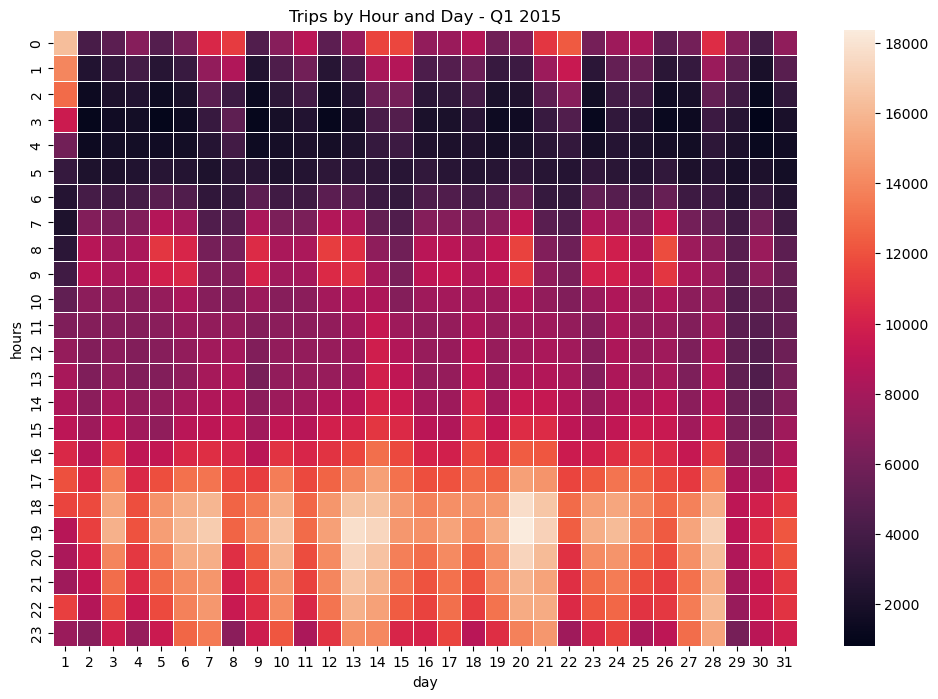

In [ ]:
# Trips by Hour and Day - Q1 2015 

plt.figure(figsize = (12,8))

sns.heatmap(q115_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q1 2015")
plt.show()

In [ ]:
# Trips by Hour and Day - Q2 2015 

plt.figure(figsize = (12,8))

sns.heatmap(q115_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q1 2015")
plt.show()

In [ ]:
q215.head()

date  month  day   day_name  hour base_number  \
6477194 2015-04-01 00:01:00  April    1  Wednesday     0      B02598   
6477195 2015-04-01 00:02:00  April    1  Wednesday     0      B02764   
6477196 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477197 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   
6477198 2015-04-01 00:03:00  April    1  Wednesday     0      B02764   

         location_id  
6477194          158  
6477195          148  
6477196           45  
6477197          231  
6477198          234

In [ ]:
q215.tail()

date month  day day_name  hour base_number  \
14270471 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270472 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270473 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270474 2015-06-30 23:59:00  June   30  Tuesday    23      B02764   
14270478 2015-06-30 23:59:00  June   30  Tuesday    23      B02682   

          location_id  
14270471          161  
14270472           80  
14270473          255  
14270474          246  
14270478           88

In [ ]:
q215_hour = q215.groupby(['hour','day']).size().unstack()
q215_hour.style.background_gradient()

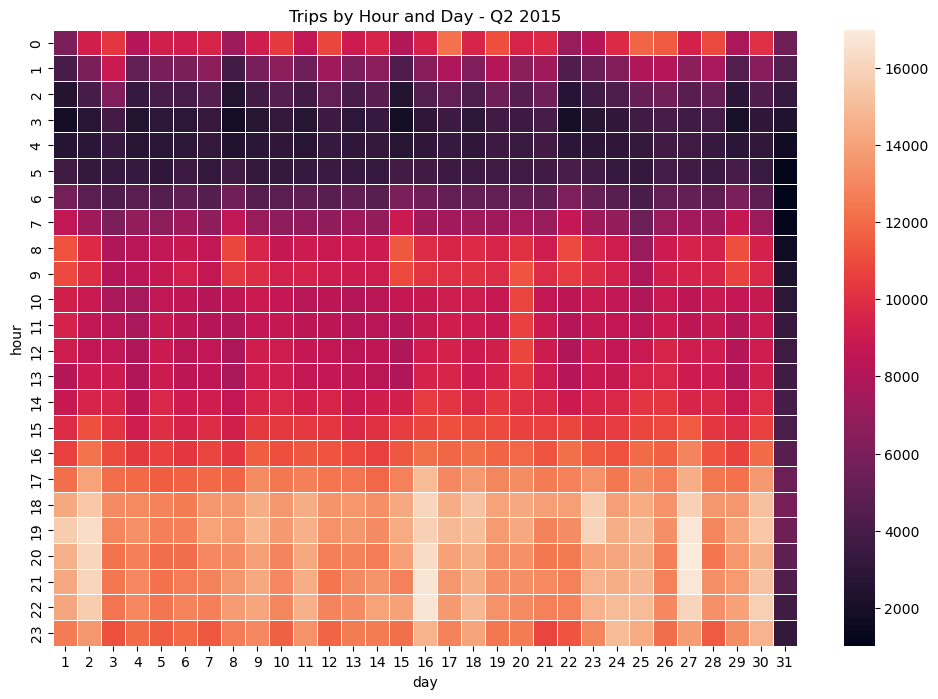

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(q215_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q2 2015")
plt.show()

In [ ]:
q1402.head()

date_time      lat      lon    base  hours day_name  hour  month
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512      0  Tuesday     0      4
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512      0  Tuesday     0      4
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512      0  Tuesday     0      4
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512      0  Tuesday     0      4
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512      0  Tuesday     0      4

In [ ]:
q1402.tail()

date_time      lat      lon    base  hours day_name  hour  \
663839 2014-06-30 22:40:00  40.7332 -73.9872  B02764     22   Monday    22   
663840 2014-06-30 23:12:00  40.7905 -73.9796  B02764     23   Monday    23   
663841 2014-06-30 23:13:00  40.7640 -73.9887  B02764     23   Monday    23   
663842 2014-06-30 23:15:00  40.7262 -73.9944  B02764     23   Monday    23   
663843 2014-06-30 23:35:00  40.7404 -73.9848  B02764     23   Monday    23   

        month  day  
663839      6   30  
663840      6   30  
663841      6   30  
663842      6   30  
663843      6   30

In [ ]:
# Trips by Hour and Day - Q2 2014 

q214_hour = q1402.groupby(['hours','day']).size().unstack()
q214_hour.style.background_gradient()


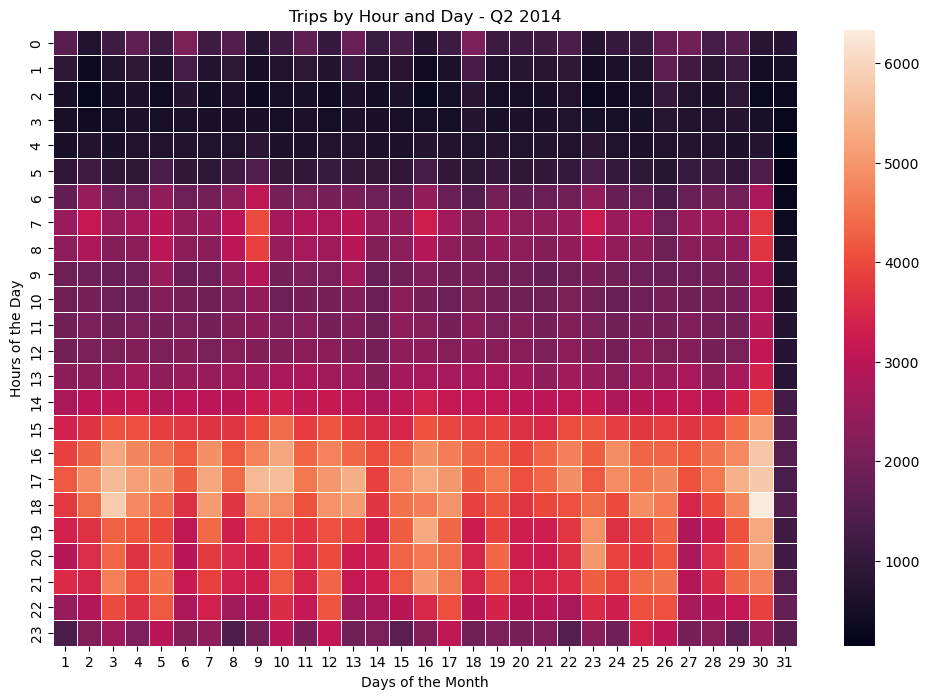

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(q214_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q2 2014")
plt.xlabel('Days of the Month')
plt.ylabel('Hours of the Day')
plt.show()

#### MOST POPULAR DAY - Q1 2015

In [ ]:
# Trips by Hour and Day - Q1 2015 

q115_hour = q115.groupby(['hours','day']).size().unstack()
q115_hour.style.background_gradient()


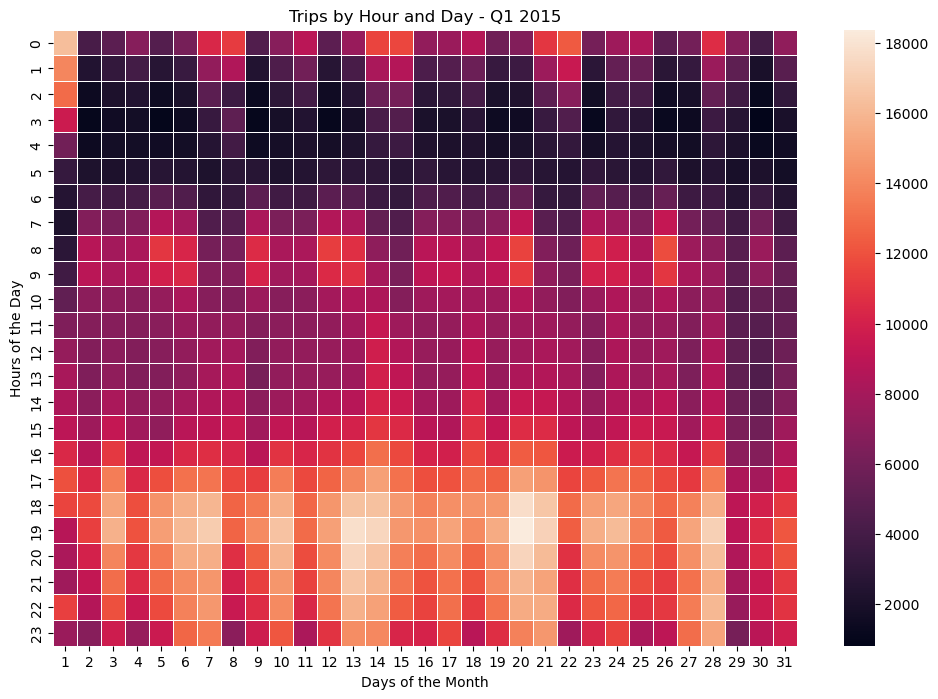

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(q115_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q1 2015")
plt.xlabel('Days of the Month')
plt.ylabel('Hours of the Day')
plt.show()

In [ ]:
mon_15 = df_2015.query('`day_name` == "Monday"')
tues_15 = df_2015.query('`day_name` == "Tuesday"')
wed_15 = df_2015.query('`day_name` == "Wednesday"')
thurs_15 = df_2015.query('`day_name` == "Thursday"')
fri_15 = df_2015.query('`day_name` == "Friday"')
sat_15 = df_2015.query('`day_name` == "Saturday"')
sun_15 = df_2015.query('`day_name` == "Sunday"')

In [ ]:
pop_mon = len(mon_15)
pop_tue = len(tues_15)
pop_wed = len(wed_15)
pop_thur = len(thurs_15)
pop_fri = len(fri_15)
pop_sat = len(sat_15)
pop_sun = len(sun_15)

In [ ]:
q1215_day = {
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'count': [pop_mon, pop_tue, pop_wed, pop_thur, pop_fri, pop_sat, pop_sun],
}

# Convert data to a DataFrame
q12_15_day  = pd.DataFrame(q1215_day)

In [ ]:
q12_15_day.head(10)

day    count
0     Monday  1546110
1    Tuesday  1673998
2  Wednesday  1697872
3   Thursday  1924278
4     Friday  2052250
5   Saturday  2165311
6     Sunday  1770288

In [ ]:
xe = q12_15_day['day']
ye = q12_15_day['count']

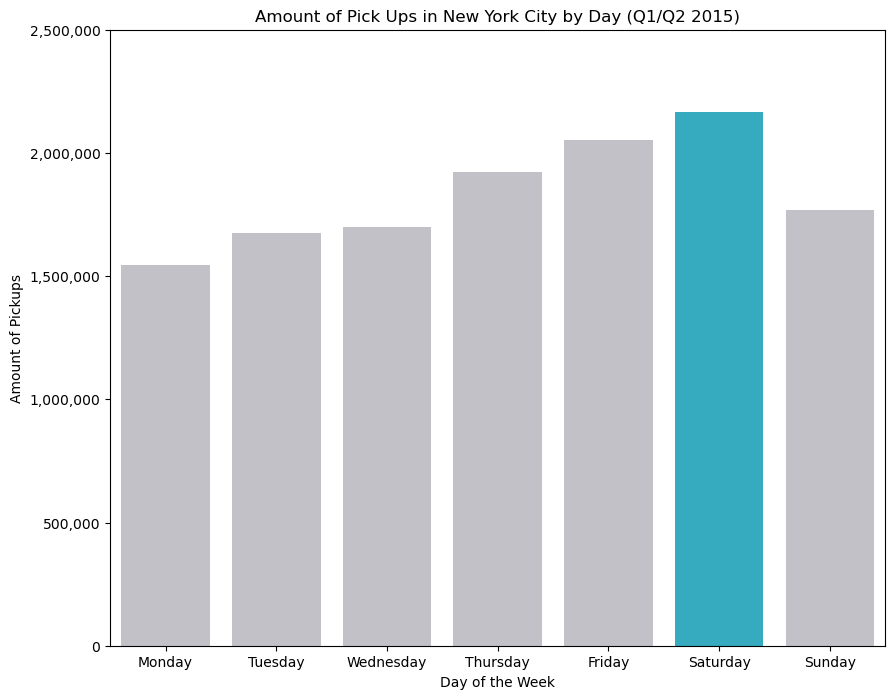

In [ ]:
cc_sat = ['#c0c0c8','#c0c0c8','#c0c0c8','#c0c0c8','#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = xe, y = ye, palette= cc_sat).set(xlabel = "Day of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q1/Q2 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

#### Q1/Q2 (2015) - Most Popular Day (Line) 

day    count
0     Monday  1546110
1    Tuesday  1673998
2  Wednesday  1697872
3   Thursday  1924278
4     Friday  2052250

#### Q1/Q2 (2015) - Most Popular Day (Bar)

#### Q1/Q2(14)/Q2(15) - Most Pickups by Month

In [ ]:
months.head()

Months  Totals
0  April  556767
1    May  642360
2   June  653158

In [ ]:
q1_15_month.head()

month    count
0   January  1916557
1  February  2218800
2     March  1943552

In [ ]:
most_pop_month.head()

month    count
0  April  1991220
1    May  2338203
2   June  2421775

#### PAIRPLOT 

Pair plot of Q2 - 2015

In [ ]:
q215.head()
q215pp = q215.copy()

In [ ]:
q115pp.drop(['date','hours'], axis = 1, inplace = True)
q115pp.head()

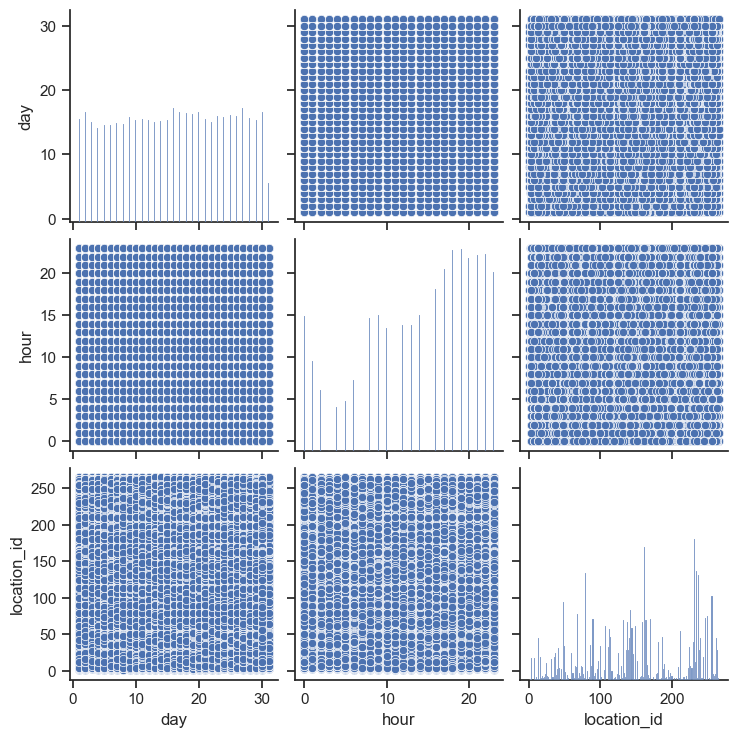

In [ ]:
sns.set_theme(style = "ticks")
sns.pairplot(q215)
plt.show()

Pair plot of Q1 - 2015

In [ ]:
q115pp = q115.copy()
q115pp.drop(['date','hours'], axis = 1, inplace = True)
q115pp.head()

month  day  day_name  hour base_number  location_id
0      1    1  Thursday     0      B02764          255
1      1    1  Thursday     0      B02598          144
2      1    1  Thursday     0      B02682          113
3      1    1  Thursday     0      B02682          234
4      1    1  Thursday     0      B02764          232

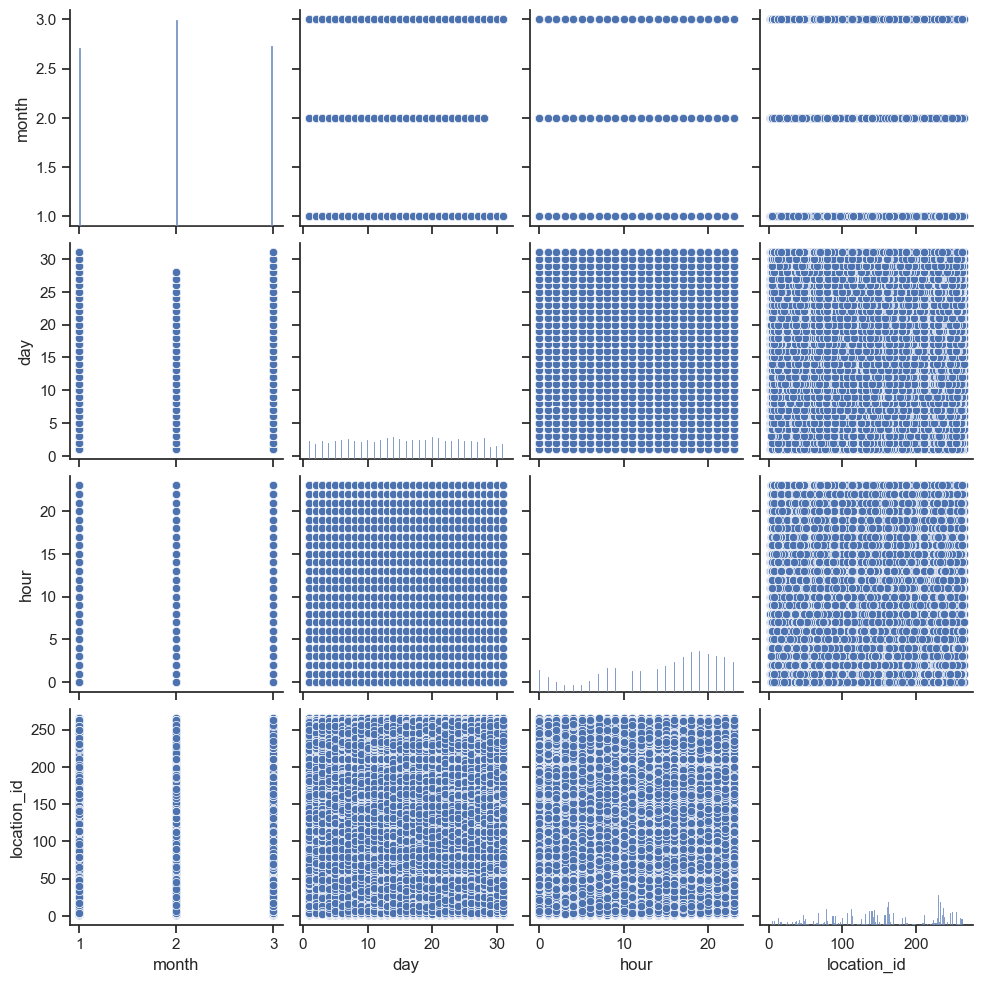

In [ ]:
sns.set_theme(style = "ticks")
sns.pairplot(q115pp)
plt.show()

pairplot of Q2 - 2014

In [ ]:

q1402pp = q1402.copy()
q1402pp.drop(['date_time', 'lat', 'lon', 'base', 'hours'], axis = 1, inplace = True)

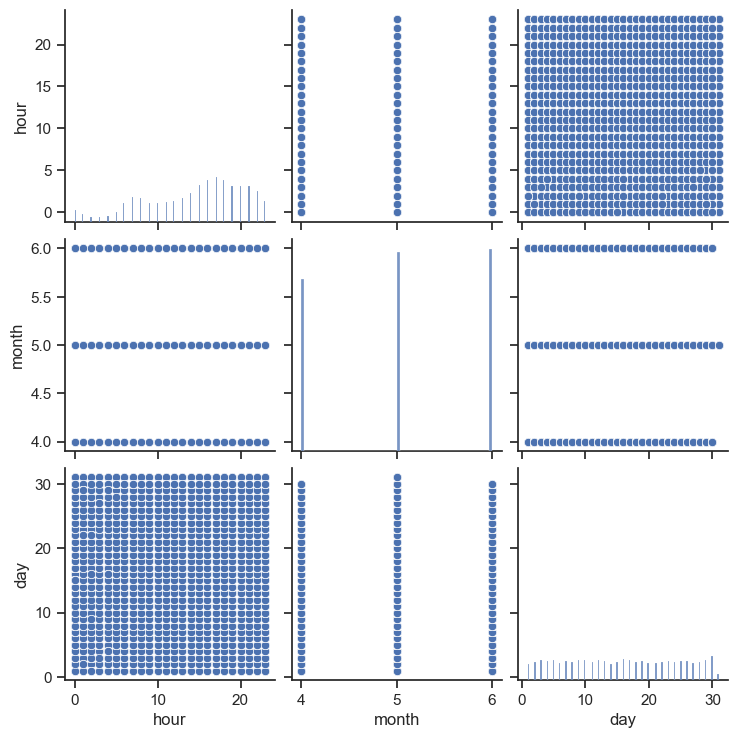

In [ ]:
sns.set_theme(style = "ticks")
sns.pairplot(q1402pp)
plt.show()

#### CREATING A HEATMAP OF PICK UPS IN NEW YORK CITY 

In [257]:
map_df = gpd.read_file(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\NYC Taxi Zones\geo_export_70ae9294-3624-4270-b277-a9eead8a9542.shp")
map_df.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0       1.0    0.000782    0.116357   
1         Queens         2.0       2.0    0.004866    0.433470   
2          Bronx         3.0       3.0    0.000314    0.084341   
3      Manhattan         4.0       4.0    0.000112    0.043567   
4  Staten Island         5.0       5.0    0.000498    0.092146   

                      zone                                           geometry  
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...  
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

In [251]:
sf = sf.set_geometry('geometry')

In [252]:
sf.shape

(263, 7)

<Figure size 2000x1600 with 0 Axes>

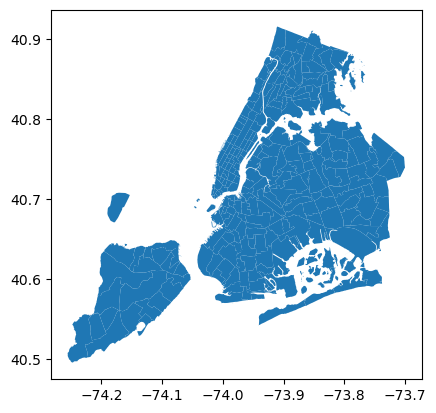

In [258]:
plt.figure(figsize=(20,16))
map_df.plot()
plt.show()


In [276]:
map_df['objectid'] = map_df['objectid'].astype(int)

In [277]:
map_df.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0         1    0.000782    0.116357   
1         Queens         2.0         2    0.004866    0.433470   
2          Bronx         3.0         3    0.000314    0.084341   
3      Manhattan         4.0         4    0.000112    0.043567   
4  Staten Island         5.0         5    0.000498    0.092146   

                      zone                                           geometry  
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...  
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

In [280]:
#Merging the data
merged = map_df.set_index('objectid').join(df_pickups_sorted.set_index('location_id'))
merged.head()

borough  location_i  shape_area  shape_leng  \
objectid                                                      
1                   EWR         1.0    0.000782    0.116357   
2                Queens         2.0    0.004866    0.433470   
3                 Bronx         3.0    0.000314    0.084341   
4             Manhattan         4.0    0.000112    0.043567   
5         Staten Island         5.0    0.000498    0.092146   

                             zone  \
objectid                            
1                  Newark Airport   
2                     Jamaica Bay   
3         Allerton/Pelham Gardens   
4                   Alphabet City   
5                   Arden Heights   

                                                   geometry    count  
objectid                                                              
1         POLYGON ((-74.18445 40.69500, -74.18449 40.695...    105.0  
2         MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...      8.0  
3         POLYGON ((-73.84793 40.87134, -73.84725 40.870...   3667.0  
4         POLYGON ((-73.97177 40.72582, -73.97179 40.725...  84867.0  
5         POLYGON ((-74.17422 40.56257, -74.17349 40.562...     26.0

In [282]:


# merged['count'] = merged['count'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [256]:
df_pickups = df_2015['location_id'].value_counts().to_frame()
df_pickups.reset_index(inplace=True)
df_pickups.columns = ['location_id', 'count']
df_pickups.head()


location_id   count
0          161  359891
1          231  352301
2          234  343982
3           79  335162
4          249  275074

In [262]:
df_pickups_sorted = df_pickups.sort_values(by='location_id', ascending = True)

In [269]:
df_pickups_sorted.head()
df_pickups_sorted.reset_index(0, inplace = True)


In [270]:
df_pickups_sorted.head()


index  location_id  count
0    251            1    105
1    259            2      8
2    190            3   3667
3     51            4  84867
4    255            5     26

In [272]:
df_pickups_sorted.drop(['index'], axis = 1, inplace = True)

In [292]:
df_pickups_sorted.shape[0]

262

In [286]:
merged.head()

borough  location_i  shape_area  shape_leng  \
objectid                                                      
1                   EWR         1.0    0.000782    0.116357   
2                Queens         2.0    0.004866    0.433470   
3                 Bronx         3.0    0.000314    0.084341   
4             Manhattan         4.0    0.000112    0.043567   
5         Staten Island         5.0    0.000498    0.092146   

                             zone  \
objectid                            
1                  Newark Airport   
2                     Jamaica Bay   
3         Allerton/Pelham Gardens   
4                   Alphabet City   
5                   Arden Heights   

                                                   geometry    count  
objectid                                                              
1         POLYGON ((-74.18445 40.69500, -74.18449 40.695...    105.0  
2         MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...      8.0  
3         POLYGON ((-73.84793 40.87134, -73.84725 40.870...   3667.0  
4         POLYGON ((-73.97177 40.72582, -73.97179 40.725...  84867.0  
5         POLYGON ((-74.17422 40.56257, -74.17349 40.562...     26.0

In [291]:
merged.shape[0]

263

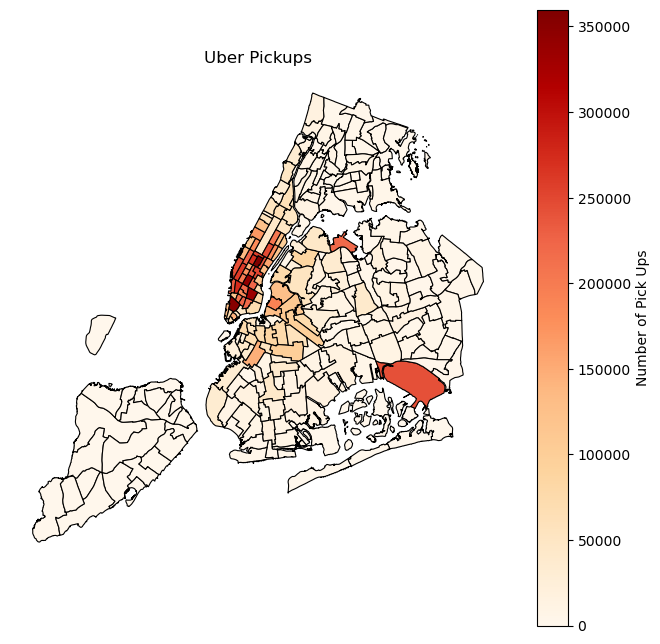

In [299]:
# norm = colors.Normalize(vmin = 0, vmax = 350000)
# cbar = plt.cm.ScalarMappable(norm=norm, cmap='gist_earth_r')

#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.axis('off')
ax.set_title('Uber Pickups')

# Plot the figure
merged.plot(column='count',cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True, legend_kwds={'label': "Number of Pick Ups"}, vmin=0 )



plt.show()


In [101]:
gdf.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0       1.0    0.000782    0.116357   
1         Queens         2.0       2.0    0.004866    0.433470   
2          Bronx         3.0       3.0    0.000314    0.084341   
3      Manhattan         4.0       4.0    0.000112    0.043567   
4  Staten Island         5.0       5.0    0.000498    0.092146   

                      zone                                           geometry  
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...  
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

In [102]:
gdf.dtypes

borough         object
location_i     float64
objectid       float64
shape_area     float64
shape_leng     float64
zone            object
geometry      geometry
dtype: object

In [4]:
import numpy as np

In [5]:
points = gdf.copy()

#  change geometry 
points['geometry'] = points['geometry'].centroid
points.head()

NameError: name 'gdf' is not defined

In [6]:
gdf['coords'] = gdf.geometry.apply(lambda p: list(p.coords)[0])

NameError: name 'gdf' is not defined

ValueError: x attribute access only provided for Point geometries

In [7]:
gdf = gpd.read_file(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\NYC Taxi Zones\geo_export_70ae9294-3624-4270-b277-a9eead8a9542.shp")

center_lat = round(gdf.geometry.centroid.y.mean(),4)
center_lon = round(gdf.geometry.centroid.x.mean(),4)

m = folium.Map(location = [40.7, -73.9], zoom_start = 9)

locations = [(x, y) for x, y in zip(points["geometry"].x, points["geometry"].y)]


marker_cluster = MarkerCluster(
    locations = locations,
    name="NYC UBER PICKUPS",
    palette = '1fbad6'
    )

marker_cluster.add_to(m);

# Iterate over each feature in the GeoDataFrame
for idx, row in gdf.iterrows():
    # Get the centroid of the geometry
    centroid = [row.geometry.centroid.y, row.geometry.centroid.x]
    # Get the area of the geometry (assuming the shapefile is in a projected coordinate system)
    area = row.geometry.area
    # Create a marker with area information
    marker = folium.Marker(location=centroid, popup=f'Area: {area:.2f} square units')
    # Add marker to the map
    marker.add_to(m)

print(gdf.geometry)

point = (lat,lon)
    

TypeError: 'function' object is not subscriptable

In [170]:
gdf.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0       1.0    0.000782    0.116357   
1         Queens         2.0       2.0    0.004866    0.433470   
2          Bronx         3.0       3.0    0.000314    0.084341   
3      Manhattan         4.0       4.0    0.000112    0.043567   
4  Staten Island         5.0       5.0    0.000498    0.092146   

                      zone                                           geometry  
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...  
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

In [9]:
geo_df = gpd.read_file(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\NYC Taxi Zones\geo_export_70ae9294-3624-4270-b277-a9eead8a9542.shp")


In [10]:
geo_df.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0       1.0    0.000782    0.116357   
1         Queens         2.0       2.0    0.004866    0.433470   
2          Bronx         3.0       3.0    0.000314    0.084341   
3      Manhattan         4.0       4.0    0.000112    0.043567   
4  Staten Island         5.0       5.0    0.000498    0.092146   

                      zone                                           geometry  
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...  
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

In [11]:
geo_df.shape

(263, 7)

In [12]:
geo_df.dtypes

borough         object
location_i     float64
objectid       float64
shape_area     float64
shape_leng     float64
zone            object
geometry      geometry
dtype: object

In [13]:
geo_points = pd.DataFrame([geo_df['objectid'], geo_df['geometry'].centroid]).T

In [14]:
geo_points

objectid                                     Unnamed 0
0        1.0  POINT (-74.17400027276304 40.69183120640133)
1        2.0  POINT (-73.83129854302213 40.61674529165957)
2        3.0  POINT (-73.84742223236718 40.86447368477527)
3        4.0  POINT (-73.97696825691759 40.72375214158459)
4        5.0  POINT (-74.18848410184935 40.55265928694546)
..       ...                                           ...
258    256.0  POINT (-73.95990462730536 40.71087993337721)
259    259.0  POINT (-73.85221545370123 40.89793202529452)
260    260.0  POINT (-73.90630644197891 40.74423471780134)
261    261.0  POINT (-74.01302277174901 40.70913894067164)
262    262.0  POINT (-73.94651035601468 40.77593240314977)

[263 rows x 2 columns]

In [19]:
geo_points['lon'] = geo_points['Unnamed 0'].apply(lambda pt: pt.x)
geo_points['lat'] = geo_points['Unnamed 0'].apply(lambda pt: pt.y)

In [20]:
geo_points.head()

objectid                                     Unnamed 0        lat        lon
0      1.0  POINT (-74.17400027276304 40.69183120640133)  40.691831 -74.174000
1      2.0  POINT (-73.83129854302213 40.61674529165957)  40.616745 -73.831299
2      3.0  POINT (-73.84742223236718 40.86447368477527)  40.864474 -73.847422
3      4.0  POINT (-73.97696825691759 40.72375214158459)  40.723752 -73.976968
4      5.0  POINT (-74.18848410184935 40.55265928694546)  40.552659 -74.188484

In [27]:
df_2015_merged = df_2015.merge(geo_points, left_on='locationID', right_on='objectid')


In [30]:
df_2015_merged.sort_values(by='Pickup_date', ascending=True)

Dispatching_base_num          Pickup_date Affiliated_base_num  \
11358149               B02598  2015-01-01 00:00:05              B02598   
8540483                B02764  2015-01-01 00:00:05              B02764   
8140124                B02682  2015-01-01 00:00:08              B02682   
3967546                B02682  2015-01-01 00:00:11              B02617   
12371033               B02764  2015-01-01 00:00:13              B02764   
...                       ...                  ...                 ...   
1103627                B02682  2015-06-30 23:59:00              B02682   
5398775                B02598  2015-06-30 23:59:00              B02598   
8167261                B02598  2015-06-30 23:59:00              B02598   
8655614                B02764  2015-06-30 23:59:00              B02764   
3627649                B02598  2015-06-30 23:59:00              B02598   

         locationID objectid                                     Unnamed 0  \
11358149        144    144.0  POINT (-73.99691854183824 40.72088889344507)   
8540483         255    255.0  POINT (-73.95741813122189 40.71880391812966)   
8140124         113    113.0  POINT (-73.99430477051166 40.73257907302683)   
3967546         234    234.0  POINT (-73.99045782354736 40.74033744175685)   
12371033        232    232.0  POINT (-73.98302455833489 40.71473250693921)   
...             ...      ...                                           ...   
1103627         249    249.0  POINT (-74.00287495910835 40.73457600733155)   
5398775          48     48.0    POINT (-73.989844643133 40.76225275531919)   
8167261         113    113.0  POINT (-73.99430477051166 40.73257907302683)   
8655614         255    255.0  POINT (-73.95741813122189 40.71880391812966)   
3627649         162    162.0  POINT (-73.97235594352028 40.75668765218863)   

                lat        lon  
11358149  40.720889 -73.996919  
8540483   40.718804 -73.957418  
8140124   40.732579 -73.994305  
3967546   40.740337 -73.990458  
12371033  40.714733 -73.983025  
...             ...        ...  
1103627   40.734576 -74.002875  
5398775   40.762253 -73.989845  
8167261   40.732579 -73.994305  
8655614   40.718804 -73.957418  
3627649   40.756688 -73.972356  

[14264215 rows x 8 columns]

In [ ]:
# Get rid of objectid, Unnamed 0 
# re-index dataframe to be correct (0)

In [33]:
df_2015_sample = df_2015_merged.sample(10000)

In [34]:
locations_ = list(zip(df_2015_merged['lat'], df_2015_merged['lon']))
#popups = ["lon:{}<br>lat:{}".format(pickups['simple_lon'], pickups['simple_lat']) for (pickups['simple_lat'], pickups['simple_lon']) in locations]

marker_cluster = MarkerCluster(
    locations = locations_,
    name="NYC UBER PICKUPS",
    palette = '1fbad6'
    )

marker_cluster.add_to(m);

In [35]:
m